In [3]:
from datetime import datetime, timedelta
from pathlib import Path

import itertools
import matplotlib
from vivarium import Artifact, InteractiveContext
import ipywidgets
import pandas as pd, numpy as np
#import seaborn as sns
pd.set_option('display.max_rows', 8)

The purpose of this notebook is to verify the LBWSG exposure implementation relative to GBD

In [4]:
path = Path('/ihme/homes/alibow/vivarium_ciff_sam/src/vivarium_ciff_sam/model_specifications/ciff_sam.yaml')
path

PosixPath('/ihme/homes/alibow/vivarium_ciff_sam/src/vivarium_ciff_sam/model_specifications/ciff_sam.yaml')

In [5]:
# manually updated the following parameters in the model specification file because it threw an error otherwise
    # population_size=100000
    # age_end=0.0767123287671233
    # exit_age=0.0767123287671233

sim = InteractiveContext(Path(path))

2022-08-26 12:22:54.930 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registering metrics.1.population_manager.metrics as modifier to metrics
2022-08-26 12:22:55.075 | DEBUG    | vivarium.framework.artifact.manager:_load_artifact:65 - Running simulation from artifact located at /ihme/costeffectiveness/artifacts/vivarium_ciff_sam/ethiopia.hdf.
2022-08-26 12:22:55.076 | DEBUG    | vivarium.framework.artifact.manager:_load_artifact:66 - Artifact base filter terms are ['draw == 0'].
2022-08-26 12:22:55.078 | DEBUG    | vivarium.framework.artifact.manager:_load_artifact:67 - Artifact additional filter terms are None.
/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.8/site-packages/vivarium_public_health/population/data_transformations.py:384: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  birth_data = (birth_data[birth_data.parameter == 'mean_value']
2022-08-26 12:22:5

2022-08-26 12:23:01.196 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registering measles.incidence_rate.paf.1.lookup_table_34 as modifier to measles.incidence_rate.paf
/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.8/site-packages/vivarium_public_health/risks/data_transformations.py:176: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  relative_risk_data = (relative_risk_data[correct_target]
/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.8/site-packages/vivarium_public_health/risks/data_transformations.py:305: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  paf_data = (paf_data[correct_target]
2022-08-26 12:23:01.406 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registering lower_respiratory_infections.incidence_rate.1.adjust_target as modi

2022-08-26 12:23:05.017 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline therapeutic_zinc.propensity
2022-08-26 12:23:05.018 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline therapeutic_zinc.exposure
2022-08-26 12:23:05.386 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline risk_factor.therapeutic_zinc.exposure_parameters
2022-08-26 12:23:05.387 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline risk_factor.therapeutic_zinc.exposure_parameters.paf
/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.8/site-packages/vivarium_public_health/risks/data_transformations.py:176: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  relative_risk_data = (relative_risk_data[correct_target]
/ihme/code/alibow/miniconda/envs

2022-08-26 12:23:13.210 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline mild_child_wasting.disability_weight
2022-08-26 12:23:13.211 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registering disability_weight.6.mild_child_wasting.disability_weight as modifier to disability_weight
2022-08-26 12:23:13.214 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline mild_child_wasting.excess_mortality_rate
2022-08-26 12:23:13.216 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline mild_child_wasting.excess_mortality_rate.paf
2022-08-26 12:23:13.217 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registering mortality_rate.6.riskstate.mild_child_wasting.adjust_mortality_rate as modifier to mortality_rate
/mnt/share/homes/alibow/vivarium_ciff_sam/src/vivarium_ciff_sam/components/wasting.py:522: FutureWarning: The defaul

2022-08-26 12:23:17.486 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline short_gestation.birth_exposure
2022-08-26 12:23:17.487 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline effect_of_low_birth_weight_and_short_gestation_on_diarrheal_diseases.relative_risk
2022-08-26 12:23:17.678 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registering diarrheal_diseases.excess_mortality_rate.2.adjust_target as modifier to diarrheal_diseases.excess_mortality_rate
2022-08-26 12:23:17.679 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registering diarrheal_diseases.excess_mortality_rate.paf.2.lookup_table_103 as modifier to diarrheal_diseases.excess_mortality_rate.paf
2022-08-26 12:23:18.089 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline effect_of_low_birth_weight_and_short_gestation_on_lower_respiratory_infectio

2022-08-26 12:23:20.751 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline insecticide_treated_nets.exposure
2022-08-26 12:23:20.987 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline risk_factor.insecticide_treated_nets.exposure_parameters
2022-08-26 12:23:20.988 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline risk_factor.insecticide_treated_nets.exposure_parameters.paf
2022-08-26 12:23:20.989 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registering low_birth_weight.birth_exposure.5.adjust_target as modifier to low_birth_weight.birth_exposure
2022-08-26 12:23:20.990 | DEBUG    | vivarium.framework.values:_register_value_producer:325 - Registering value pipeline insecticide_treated_nets.effect
2022-08-26 12:23:21.439 | DEBUG    | vivarium.framework.values:register_value_modifier:375 - Registering low_birth_weight.risk_speci

/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.8/site-packages/vivarium/framework/randomness.py:95: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._map = self._map.append(mapping_update).drop_duplicates()
/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.8/site-packages/vivarium/framework/randomness.py:95: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._map = self._map.append(mapping_update).drop_duplicates()
/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.8/site-packages/vivarium/framework/randomness.py:95: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._map = self._map.append(mapping_update).drop_duplicates()
/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/

## Capture birthweight at initialization
For the early and late neonatal age groups

In [6]:
pop0 = sim.get_population()
pop0

,tracked,age,alive,sex,location,exit_time,entrance_time,cause_of_death,years_of_life_lost,diarrheal_diseases,...,multiple_micronutrient_supplementation_exposure,balanced_energy_protein_supplementation_exposure,short_gestation_exposure,low_birth_weight_exposure,effect_of_low_birth_weight_and_short_gestation_on_early_neonatal_diarrheal_diseases_relative_risk,effect_of_low_birth_weight_and_short_gestation_on_late_neonatal_diarrheal_diseases_relative_risk,effect_of_low_birth_weight_and_short_gestation_on_late_neonatal_lower_respiratory_infections_relative_risk,effect_of_low_birth_weight_and_short_gestation_on_early_neonatal_lower_respiratory_infections_relative_risk,effect_of_low_birth_weight_and_short_gestation_on_early_neonatal_affected_unmodeled_relative_risk,effect_of_low_birth_weight_and_short_gestation_on_late_neonatal_affected_unmodeled_relative_risk
0,True,0.019167,alive,Male,Ethiopia,NaT,2021-06-30 12:00:00,not_dead,0.0,susceptible_to_diarrheal_diseases,...,cat1,cat1,39.890216,2128.068591,13.663443,9.637755,9.637755,13.663443,13.663443,9.637755
1,True,0.012411,alive,Female,Ethiopia,NaT,2021-06-30 12:00:00,not_dead,0.0,susceptible_to_diarrheal_diseases,...,cat1,cat1,41.852250,3032.995408,1.279003,1.672641,1.672641,1.279003,1.279003,1.672641
2,True,0.023611,alive,Male,Ethiopia,NaT,2021-06-30 12:00:00,not_dead,0.0,susceptible_to_diarrheal_diseases,...,cat1,cat1,41.059242,2932.382704,1.634141,2.174342,2.174342,1.634141,1.634141,2.174342
3,True,0.002792,alive,Female,Ethiopia,NaT,2021-06-30 12:00:00,not_dead,0.0,susceptible_to_diarrheal_diseases,...,cat1,cat1,39.706669,3159.153958,1.065888,1.478018,1.478018,1.065888,1.065888,1.478018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,True,0.051003,alive,Male,Ethiopia,NaT,2021-06-30 12:00:00,not_dead,0.0,susceptible_to_diarrheal_diseases,...,cat1,cat1,39.121262,3974.734639,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
99997,True,0.068160,alive,Male,Ethiopia,NaT,2021-06-30 12:00:00,not_dead,0.0,susceptible_to_diarrheal_diseases,...,cat1,cat1,37.070528,3819.035480,2.015098,1.349921,1.349921,2.015098,2.015098,1.349921
99998,True,0.037155,alive,Female,Ethiopia,NaT,2021-06-30 12:00:00,not_dead,0.0,susceptible_to_diarrheal_diseases,...,cat1,cat1,31.749653,2474.201064,28.471552,13.447246,13.447246,28.471552,28.471552,13.447246
99999,True,0.005108,alive,Male,Ethiopia,NaT,2021-06-30 12:00:00,not_dead,0.0,susceptible_to_diarrheal_diseases,...,cat1,cat1,38.417963,4333.293701,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data = pd.concat([pop0.loc[:, ['age','sex']],
                 sim.get_value('low_birth_weight_and_short_gestation.exposure')(pop0.index),
                 sim.get_value('low_birth_weight.exposure')(pop0.index),
                 sim.get_value('effect_of_low_birth_weight_and_short_gestation_on_diarrheal_diseases.relative_risk')(pop0.index),
                 sim.get_value('short_gestation.exposure')(pop0.index)], 
                 axis=1).rename(columns={0:'relative_risk'})
data['age_group'] = np.where(data.age<7/365,'early_neonatal',
                           np.where(data.age<28/365,'late_neonatal',
                                   np.where(data.age<1,'post_neonatal', '1_to_5')))
data

,age,sex,risk_factor.low_birth_weight_and_short_gestation.exposure,low_birth_weight_exposure,relative_risk,short_gestation_exposure,age_group
0,0.019167,Male,cat32,2128.068591,13.663443,39.890216,early_neonatal
1,0.012411,Female,cat51,3032.995408,1.279003,41.852250,early_neonatal
2,0.023611,Male,cat43,2932.382704,2.174342,41.059242,late_neonatal
3,0.002792,Female,cat52,3159.153958,1.065888,39.706669,early_neonatal
...,...,...,...,...,...,...,...
99996,0.051003,Male,cat54,3974.734639,1.000000,39.121262,late_neonatal
99997,0.068160,Male,cat50,3819.035480,1.349921,37.070528,late_neonatal
99998,0.037155,Female,cat26,2474.201064,13.447246,31.749653,late_neonatal
99999,0.005108,Male,cat53,4333.293701,1.000000,38.417963,early_neonatal


## Capture birth weight at birth and run until entirely new population of early and late neonatates

(all born into the sim rather than initialized into the sim)

In [8]:
pop_t = pop0.copy()
new_births = pd.DataFrame()
for x in list(range(0,56)):
    sim.step()
    pop_t_minus_1 = pop_t.copy()
    pop_t = sim.get_population()
    simulants = [i for i in pop_t.index if i not in pop_t_minus_1.index]
    new_births = new_births.append(pd.concat([pop_t.loc[simulants][['age','sex']],
             sim.get_value('low_birth_weight_and_short_gestation.exposure')(pop_t.loc[simulants].index),
             sim.get_value('low_birth_weight.exposure')(pop_t.loc[simulants].index),
             sim.get_value('effect_of_low_birth_weight_and_short_gestation_on_diarrheal_diseases.relative_risk')(pop_t.loc[simulants].index),
             sim.get_value('short_gestation.exposure')(pop_t.loc[simulants].index)]
                                             , axis=1).rename(columns={0:'relative_risk'}))

2022-03-04 16:04:51.505 | DEBUG    | vivarium.framework.engine:step:142 - 2021-07-01 00:00:00
2022-03-04 16:05:40.117 | DEBUG    | vivarium.framework.engine:step:142 - 2021-07-01 12:00:00
2022-03-04 16:06:20.989 | DEBUG    | vivarium.framework.engine:step:142 - 2021-07-02 00:00:00
2022-03-04 16:07:07.992 | DEBUG    | vivarium.framework.engine:step:142 - 2021-07-02 12:00:00
2022-03-04 16:08:10.643 | DEBUG    | vivarium.framework.engine:step:142 - 2021-07-03 00:00:00
2022-03-04 16:08:56.324 | DEBUG    | vivarium.framework.engine:step:142 - 2021-07-03 12:00:00
2022-03-04 16:09:54.334 | DEBUG    | vivarium.framework.engine:step:142 - 2021-07-04 00:00:00
2022-03-04 16:11:07.005 | DEBUG    | vivarium.framework.engine:step:142 - 2021-07-04 12:00:00
2022-03-04 16:12:05.227 | DEBUG    | vivarium.framework.engine:step:142 - 2021-07-05 00:00:00
2022-03-04 16:12:46.895 | DEBUG    | vivarium.framework.engine:step:142 - 2021-07-05 12:00:00
2022-03-04 16:13:45.240 | DEBUG    | vivarium.framework.engi

In [9]:
new_births['age_group'] = 'birth'

## Capture birthweight at end of run

In [10]:
pop1 = sim.get_population()

In [11]:
data1 = pd.concat([pop1.loc[:, ['age','sex']],
                 sim.get_value('low_birth_weight_and_short_gestation.exposure')(pop1.index),
                 sim.get_value('low_birth_weight.exposure')(pop1.index),
                 sim.get_value('effect_of_low_birth_weight_and_short_gestation_on_diarrheal_diseases.relative_risk')(pop1.index),
                 sim.get_value('short_gestation.exposure')(pop1.index)]
                  , axis=1).rename(columns={0:'relative_risk'})
data1['age_group'] = np.where(data1.age<7/365,'early_neonatal',
                           np.where(data1.age<28/365,'late_neonatal',
                                   np.where(data1.age<1,'post_neonatal', '1_to_5')))
data1

,age,sex,risk_factor.low_birth_weight_and_short_gestation.exposure,low_birth_weight_exposure,relative_risk,short_gestation_exposure,age_group
15,0.076669,Female,cat52,3230.824492,1.491707,38.634906,late_neonatal
20,0.070315,Male,cat117,1838.894339,17.693673,39.196934,late_neonatal
329,0.016717,Male,cat44,2629.186294,2.739805,38.268367,early_neonatal
333,0.050851,Female,cat51,3366.140929,1.115227,40.645288,late_neonatal
...,...,...,...,...,...,...,...
200906,0.000552,Male,cat52,3124.640355,1.178828,38.835492,early_neonatal
200907,0.001089,Female,cat51,3265.379926,1.000000,40.407591,early_neonatal
200908,0.000603,Male,cat42,2711.376655,2.555976,37.087481,early_neonatal
200909,0.000630,Male,cat36,2183.402267,10.239897,36.604939,early_neonatal


In [12]:
# export dataframe so nathaniel can verify RRs
data_prep = data.copy()
data_prep['time_point'] = 'initialization'
data1_prep = data1.copy()
data1_prep['time_point'] = '28_days'
d = pd.concat([data_prep,data1_prep])
d.to_csv('lbwsg_data_6.csv')

In [13]:
d.to_pickle('lbwsg_data_6')

In [15]:
d = pd.read_pickle('lbwsg_data_6')
d

,age,sex,risk_factor.low_birth_weight_and_short_gestation.exposure,low_birth_weight_exposure,relative_risk,short_gestation_exposure,age_group,time_point
0,0.019167,Male,cat32,2128.068591,13.663443,39.890216,early_neonatal,initialization
1,0.012411,Female,cat51,3032.995408,1.279003,41.852250,early_neonatal,initialization
2,0.023611,Male,cat43,2932.382704,2.174342,41.059242,late_neonatal,initialization
3,0.002792,Female,cat52,3159.153958,1.065888,39.706669,early_neonatal,initialization
...,...,...,...,...,...,...,...,...
200906,0.000552,Male,cat52,3124.640355,1.178828,38.835492,early_neonatal,28_days
200907,0.001089,Female,cat51,3265.379926,1.000000,40.407591,early_neonatal,28_days
200908,0.000603,Male,cat42,2711.376655,2.555976,37.087481,early_neonatal,28_days
200909,0.000630,Male,cat36,2183.402267,10.239897,36.604939,early_neonatal,28_days


# Load artifact data

In [4]:
art = Artifact('/ihme/costeffectiveness/artifacts/vivarium_ciff_sam/ethiopia.hdf',
               filter_terms=['year_start == 2019', f'age_end <= 5'])

In [5]:
art_exposure = art.load(f'risk_factor.low_birth_weight_and_short_gestation.exposure')['draw_0'].reset_index()
art_cats = art.load(f'risk_factor.low_birth_weight_and_short_gestation.categories')
art_exposure['bw_start'] = np.nan
art_exposure['bw_end'] = np.nan
art_exposure['ga_start'] = np.nan
art_exposure['ga_end'] = np.nan
for i in art_exposure.index:
    art_exposure['bw_start'][i] = art_cats[art_exposure.parameter[i]].split('wks, [')[1].split(',')[0]
    art_exposure['bw_end'][i] = art_cats[art_exposure.parameter[i]].split('wks, [')[1].split(', ')[1].split(')')[0]
    art_exposure['ga_start'][i] = art_cats[art_exposure.parameter[i]].split('- [')[1].split(', ')[0]
    art_exposure['ga_end'][i] = art_cats[art_exposure.parameter[i]].split('- [')[1].split(') wks')[0].split(', ')[1]
    
art_exposure['bw_mid'] = (art_exposure.bw_end - art_exposure.bw_start)/2 + art_exposure.bw_start
art_exposure['ga_mid'] = (art_exposure.ga_end - art_exposure.ga_start)/2 + art_exposure.ga_start
art_exposure['age_group'] = np.where(art_exposure.age_end==0,'birth',
                                    np.where(art_exposure.age_start==0,'early_neonatal',
                                            np.where(art_exposure.age_end < 0.08, 'late_neonatal', 'other')))
art_exposure

<ipython-input-5-bad3b1ff10d4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  art_exposure['bw_start'][i] = art_cats[art_exposure.parameter[i]].split('wks, [')[1].split(',')[0]
<ipython-input-5-bad3b1ff10d4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  art_exposure['bw_end'][i] = art_cats[art_exposure.parameter[i]].split('wks, [')[1].split(', ')[1].split(')')[0]
<ipython-input-5-bad3b1ff10d4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

,sex,age_start,age_end,year_start,year_end,parameter,draw_0,bw_start,bw_end,ga_start,ga_end,bw_mid,ga_mid,age_group
0,Female,-1.000000,0.000000,2019,2020,cat10,0.001853,500.0,1000.0,24.0,26.0,750.0,25.0,birth
1,Female,-1.000000,0.000000,2019,2020,cat106,0.000644,1000.0,1500.0,36.0,37.0,1250.0,36.5,birth
2,Female,-1.000000,0.000000,2019,2020,cat11,0.001160,500.0,1000.0,26.0,28.0,750.0,27.0,birth
3,Female,-1.000000,0.000000,2019,2020,cat116,0.001423,1000.0,1500.0,38.0,40.0,1250.0,39.0,birth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,Male,0.019178,0.076712,2019,2020,cat89,0.001273,3000.0,3500.0,30.0,32.0,3250.0,31.0,late_neonatal
345,Male,0.019178,0.076712,2019,2020,cat90,0.000562,3500.0,4000.0,30.0,32.0,3750.0,31.0,late_neonatal
346,Male,0.019178,0.076712,2019,2020,cat95,0.003673,3000.0,3500.0,32.0,34.0,3250.0,33.0,late_neonatal
347,Male,0.019178,0.076712,2019,2020,cat96,0.002109,3500.0,4000.0,32.0,34.0,3750.0,33.0,late_neonatal


In [6]:
import pandas as pd, numpy as np, os
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
from matplotlib.backends.backend_pdf import PdfPages

## Prep simulation output data

In [12]:
# merge in birthweight category values from the artifact (selecting female and birth just for a template)
def prep_simulation_data(data):
    sim_data = (data.rename(columns={'risk_factor.low_birth_weight_and_short_gestation.exposure':'parameter'})
                .merge(art_exposure.loc[(art_exposure.sex=='Female') & (art_exposure.age_end==0)]
                       [['parameter','bw_end','bw_start','bw_mid','ga_mid']], on=['parameter']))
    sim_data['count'] = 1
    num = sim_data.groupby(['sex','age_group','parameter','bw_mid','ga_mid']).sum()[['count']]
    den = sim_data.groupby(['sex','age_group']).sum()[['count']]
    prev = (num/den).reset_index()
    return prev

In [14]:
test_prepped = prep_simulation_data(test.loc[test.time_point=='initialization'])

In [16]:
# at initialization
prev = prep_simulation_data(d.loc[d.time_point=='initialization'])

# at birth
#births = prep_simulation_data(new_births)

# at 40 days
prev1 = prep_simulation_data(d.loc[d.time_point=='28_days'])

In [17]:
def bar_chart(sex, age_group, prev, time, log=True):
    p = (art_exposure.loc[(art_exposure.sex==sex)&(art_exposure.age_group==age_group)][['parameter','ga_mid','bw_mid','draw_0']]
        .merge(prev.loc[(prev.sex==sex)&(prev.age_group==age_group)], on=['parameter','ga_mid','bw_mid'], how='left')
         .sort_values(by='draw_0'))

    barWidth = 0.4
    a = np.arange(len(p))
    b = [x + barWidth for x in a]
    plt.figure(dpi=200)
    plt.bar(a, p.draw_0, width=barWidth, label='Artifact')
    plt.bar(b, p['count'], width=barWidth, label='Simulation')
    plt.legend()
    plt.ylabel('Proportion')
    plt.xlabel('LBSWG category')
    if log==True:
        plt.semilogy()
    plt.xticks([])
    plt.title(f'{age_group} {sex}s {time}')

In [18]:
def plot_exposure_heat_map(sex, age_group, prev, time):
    p = (art_exposure.loc[(art_exposure.sex==sex)&(art_exposure.age_group==age_group)][['parameter','ga_mid','bw_mid','draw_0']]
        .merge(prev.loc[(prev.sex==sex)&(prev.age_group==age_group)], on=['parameter','ga_mid','bw_mid'], how='left'))
    p = p.replace(np.nan, 0)
    p['diff'] = p['count'] - p.draw_0
    p['percent_diff'] = p['diff'] / p.draw_0 * 100

    s = p.pivot_table(index='ga_mid', columns='bw_mid', values='draw_0').sort_index(ascending=False)
    s = s.replace(0,np.nan)
    s = np.log(s/(1-s))
    a = p.pivot_table(index='ga_mid', columns='bw_mid', values='percent_diff').sort_index(ascending=False)
    a = a.replace(0,np.nan)
    #a=np.log(a/(1-a))
    fig, (ax1, ax2) = plt.subplots(1,2, dpi=200)
    sns.heatmap(s, ax=ax1,annot=True,cmap="coolwarm",vmin=-11,vmax=-1.5)
    sns.heatmap(a, ax=ax2,annot=True,cmap="coolwarm",vmin=-50,vmax=50)
    ax1.set_title('Logit-transformed exposure\ndistribution from artifact')
    ax2.set_title('Simulation exposure relative\nto artifact percent difference')
    for ax in [ax1,ax2]:
        ax.set_xlabel('Birthweight midpoint (g)')
        ax.set_ylabel('Gestational age midpoint (weeks)')
    plt.subplots_adjust(right=1.8, top=1)    
    plt.suptitle(f'{age_group} {sex}s {time}',
                x=0.9, y=1.25)

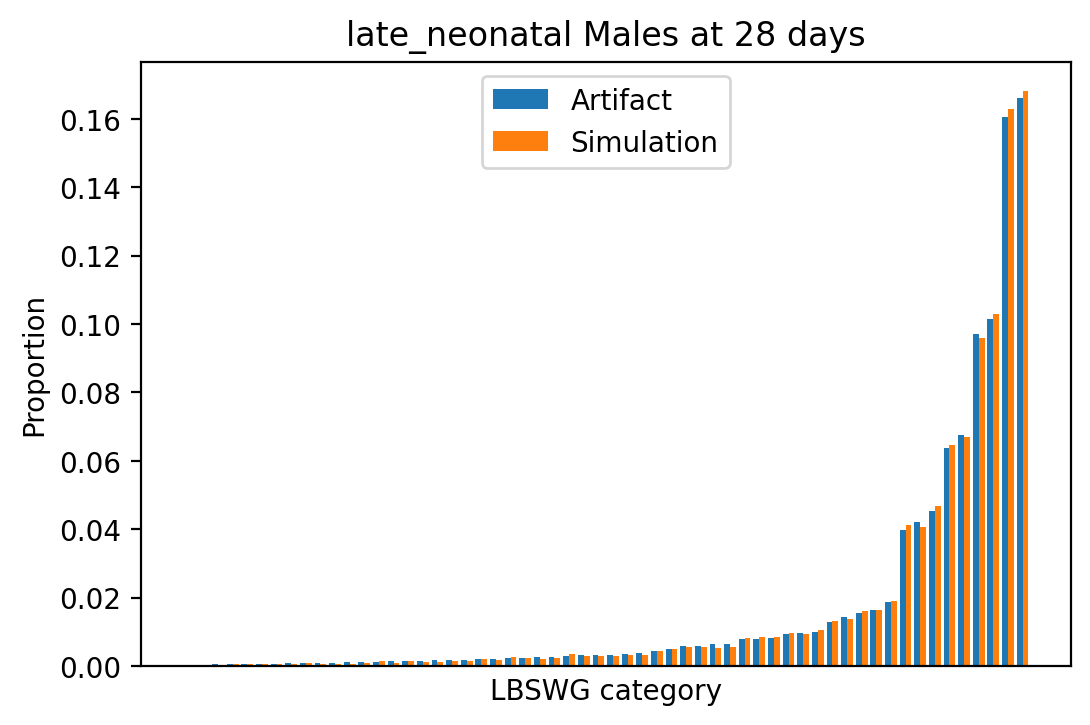

In [20]:
bar_chart('Male', 'late_neonatal', prev1, 'at 28 days', log=False)

<ipython-input-17-0723612d4acf>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(dpi=200)


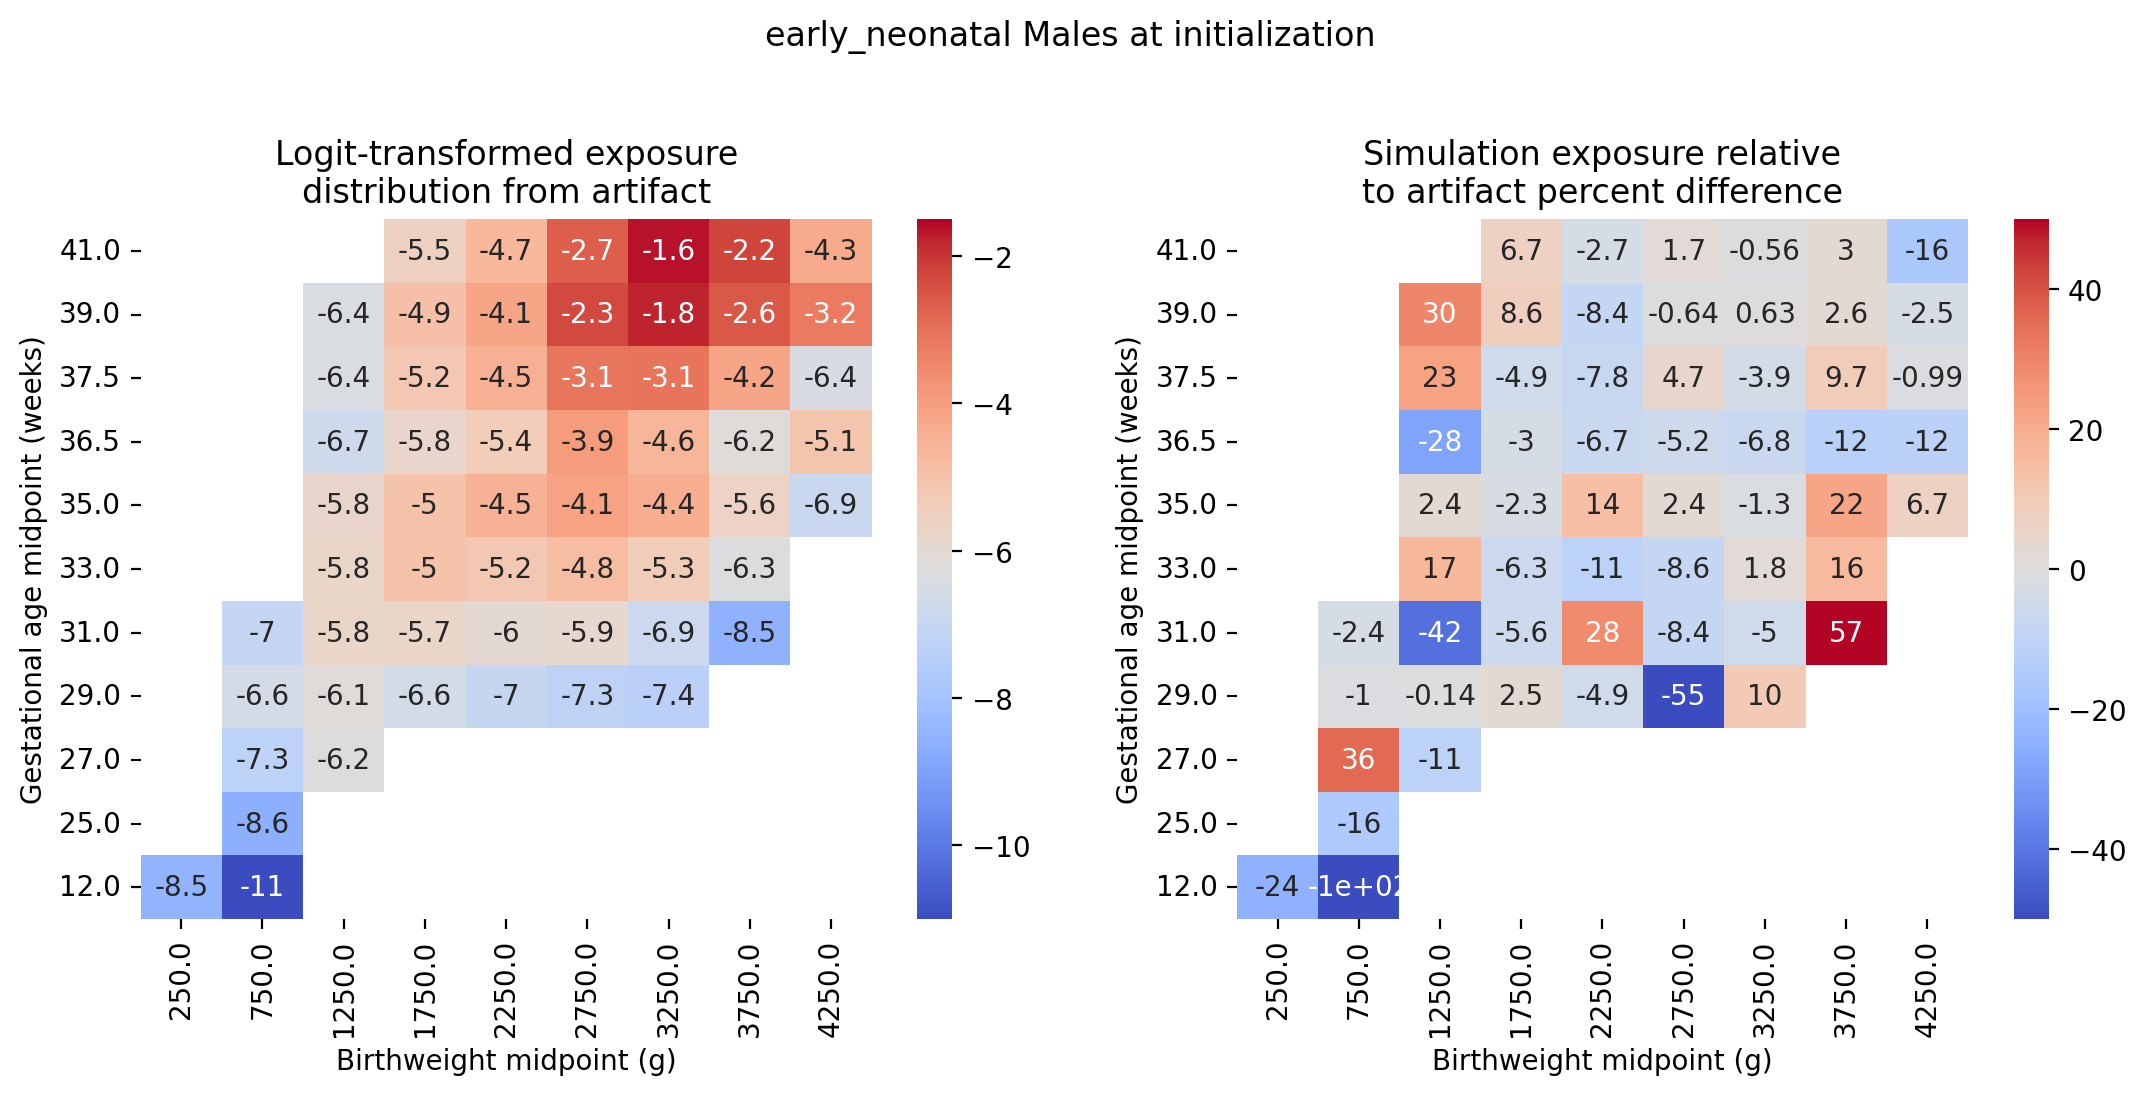

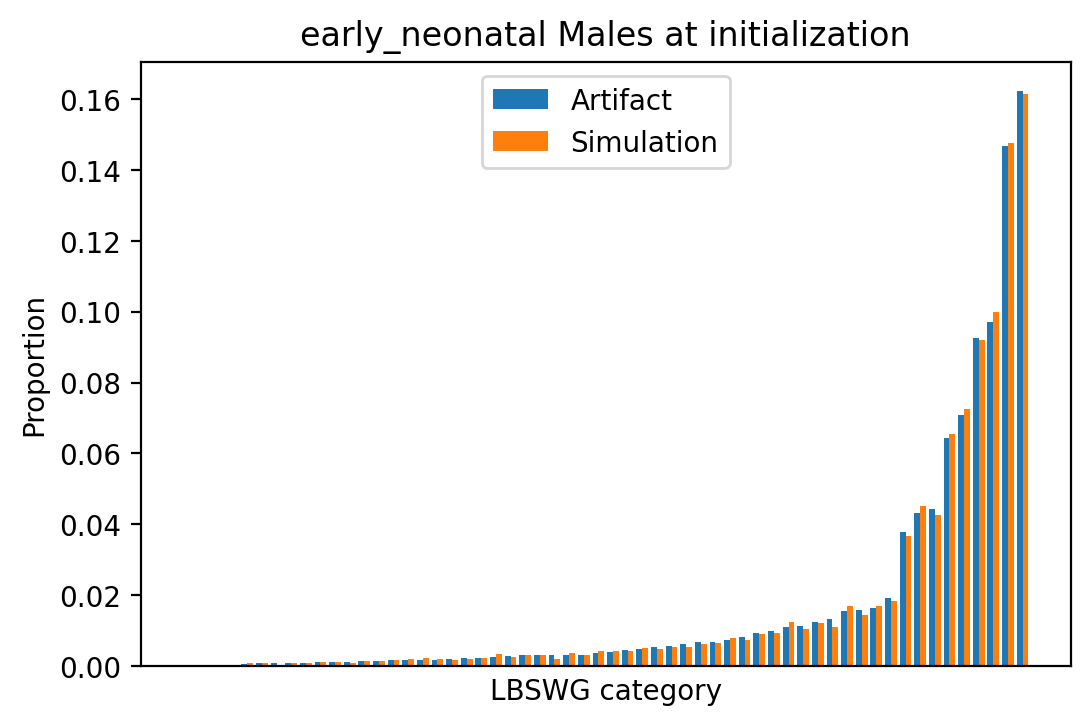

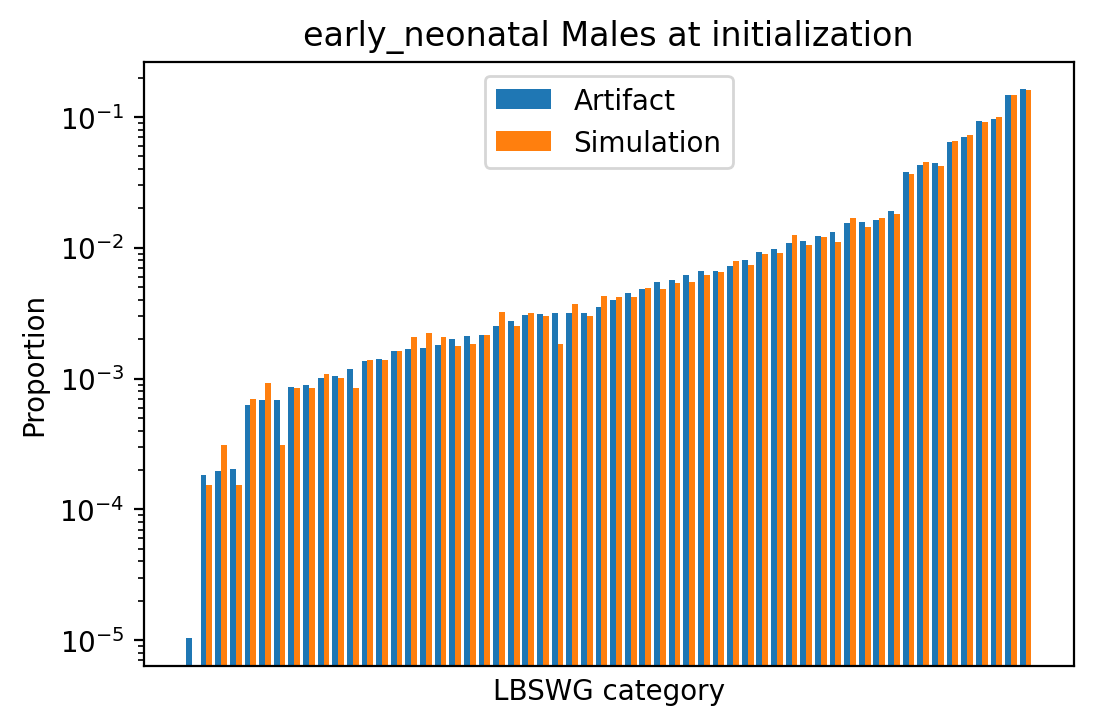

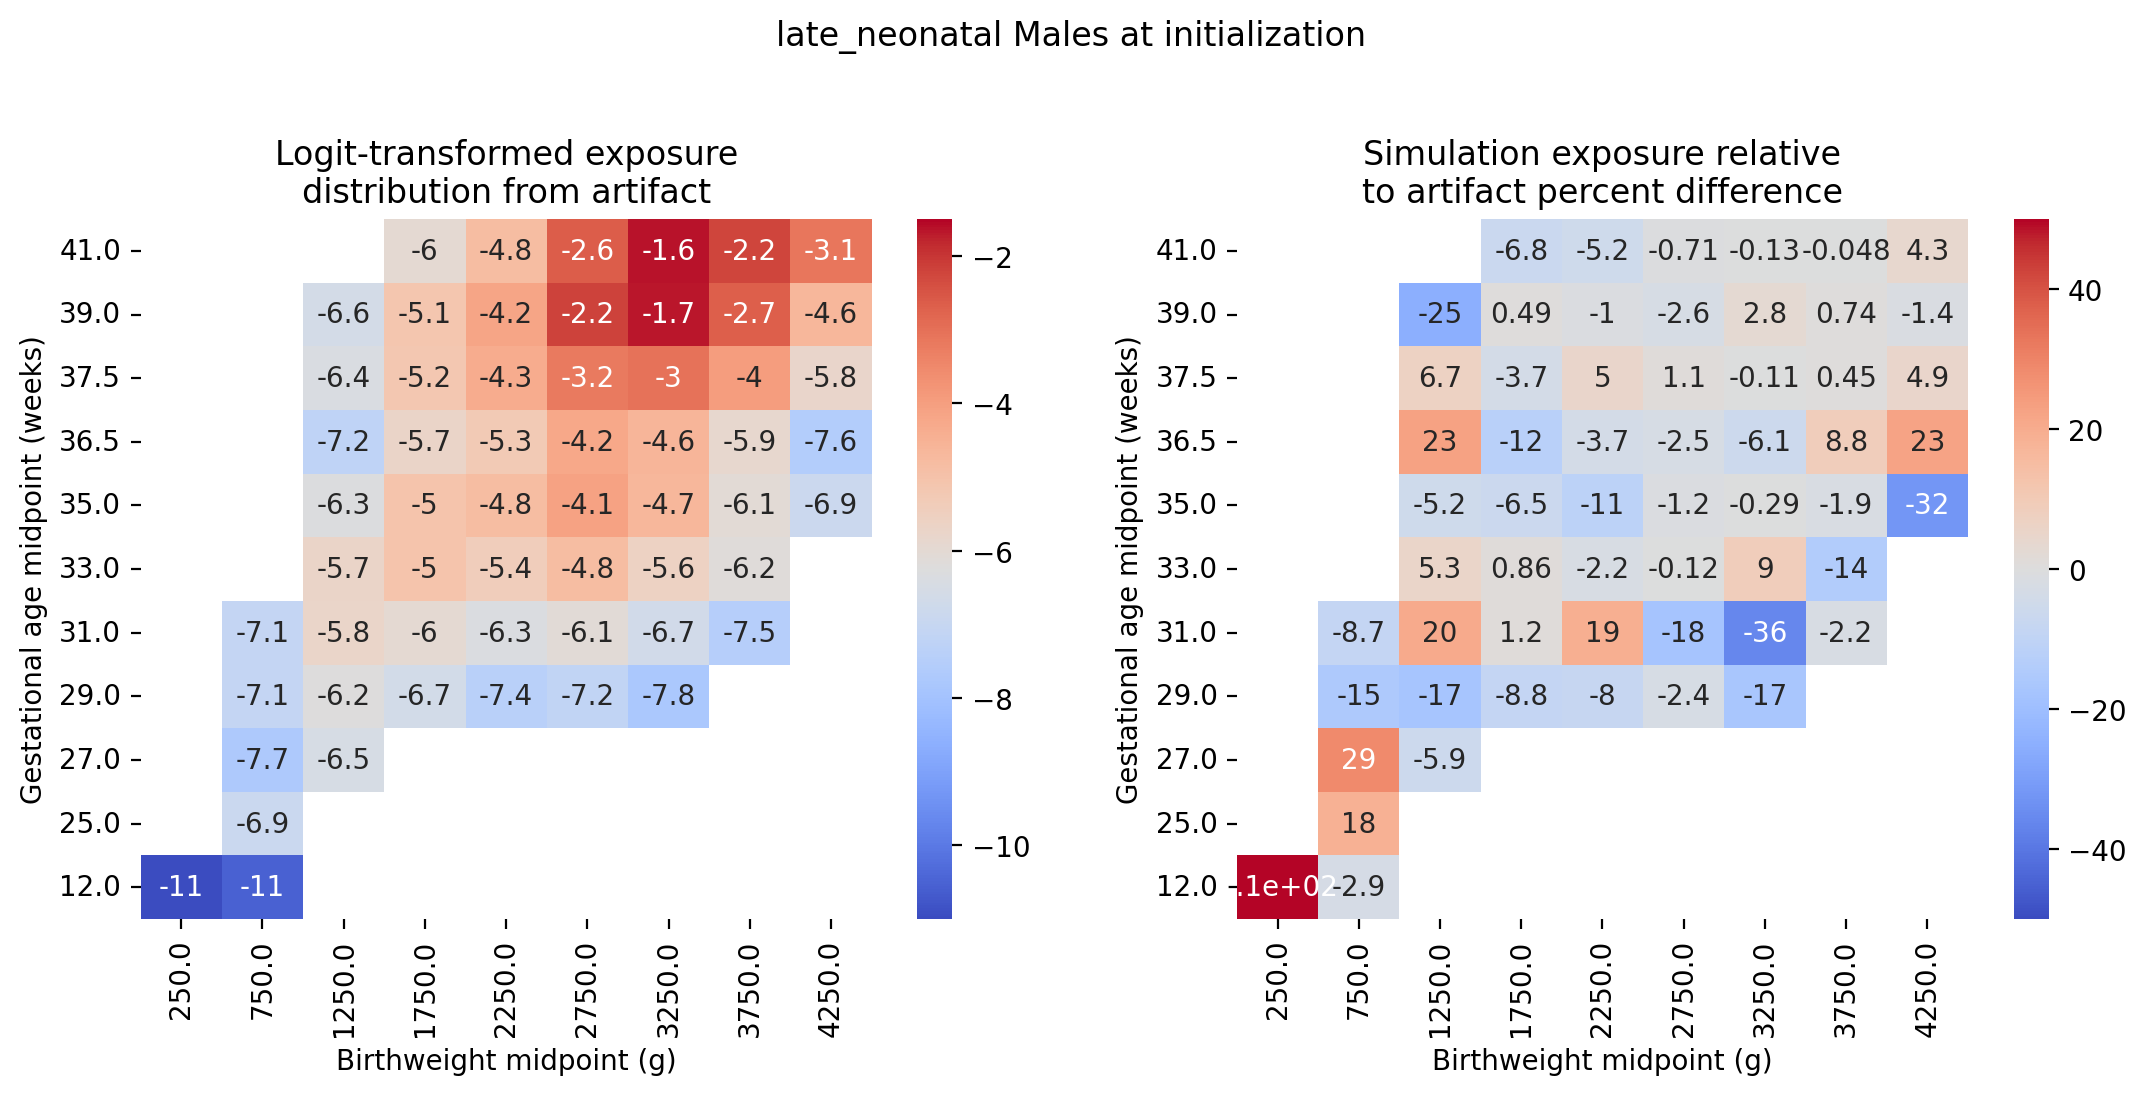

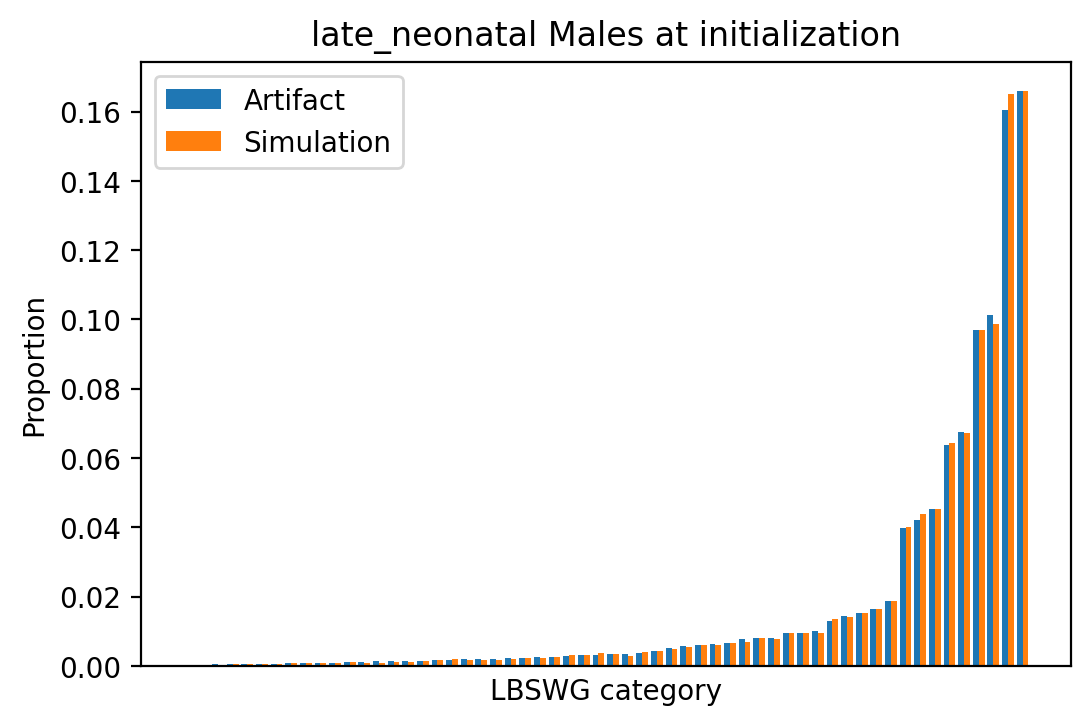

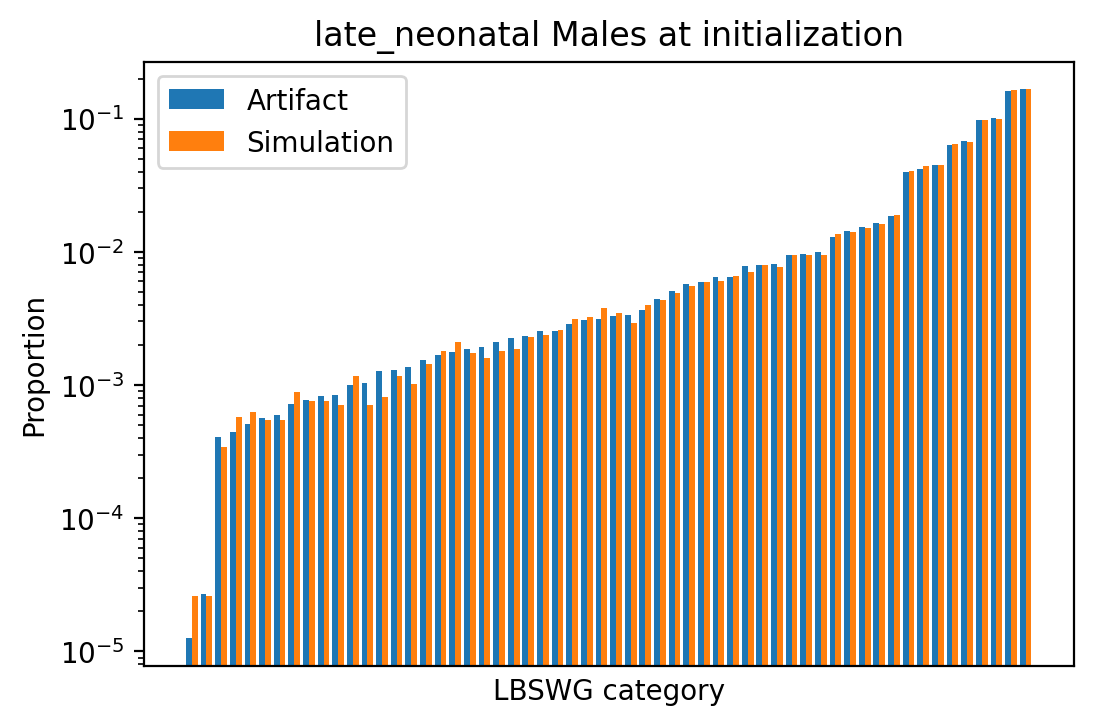

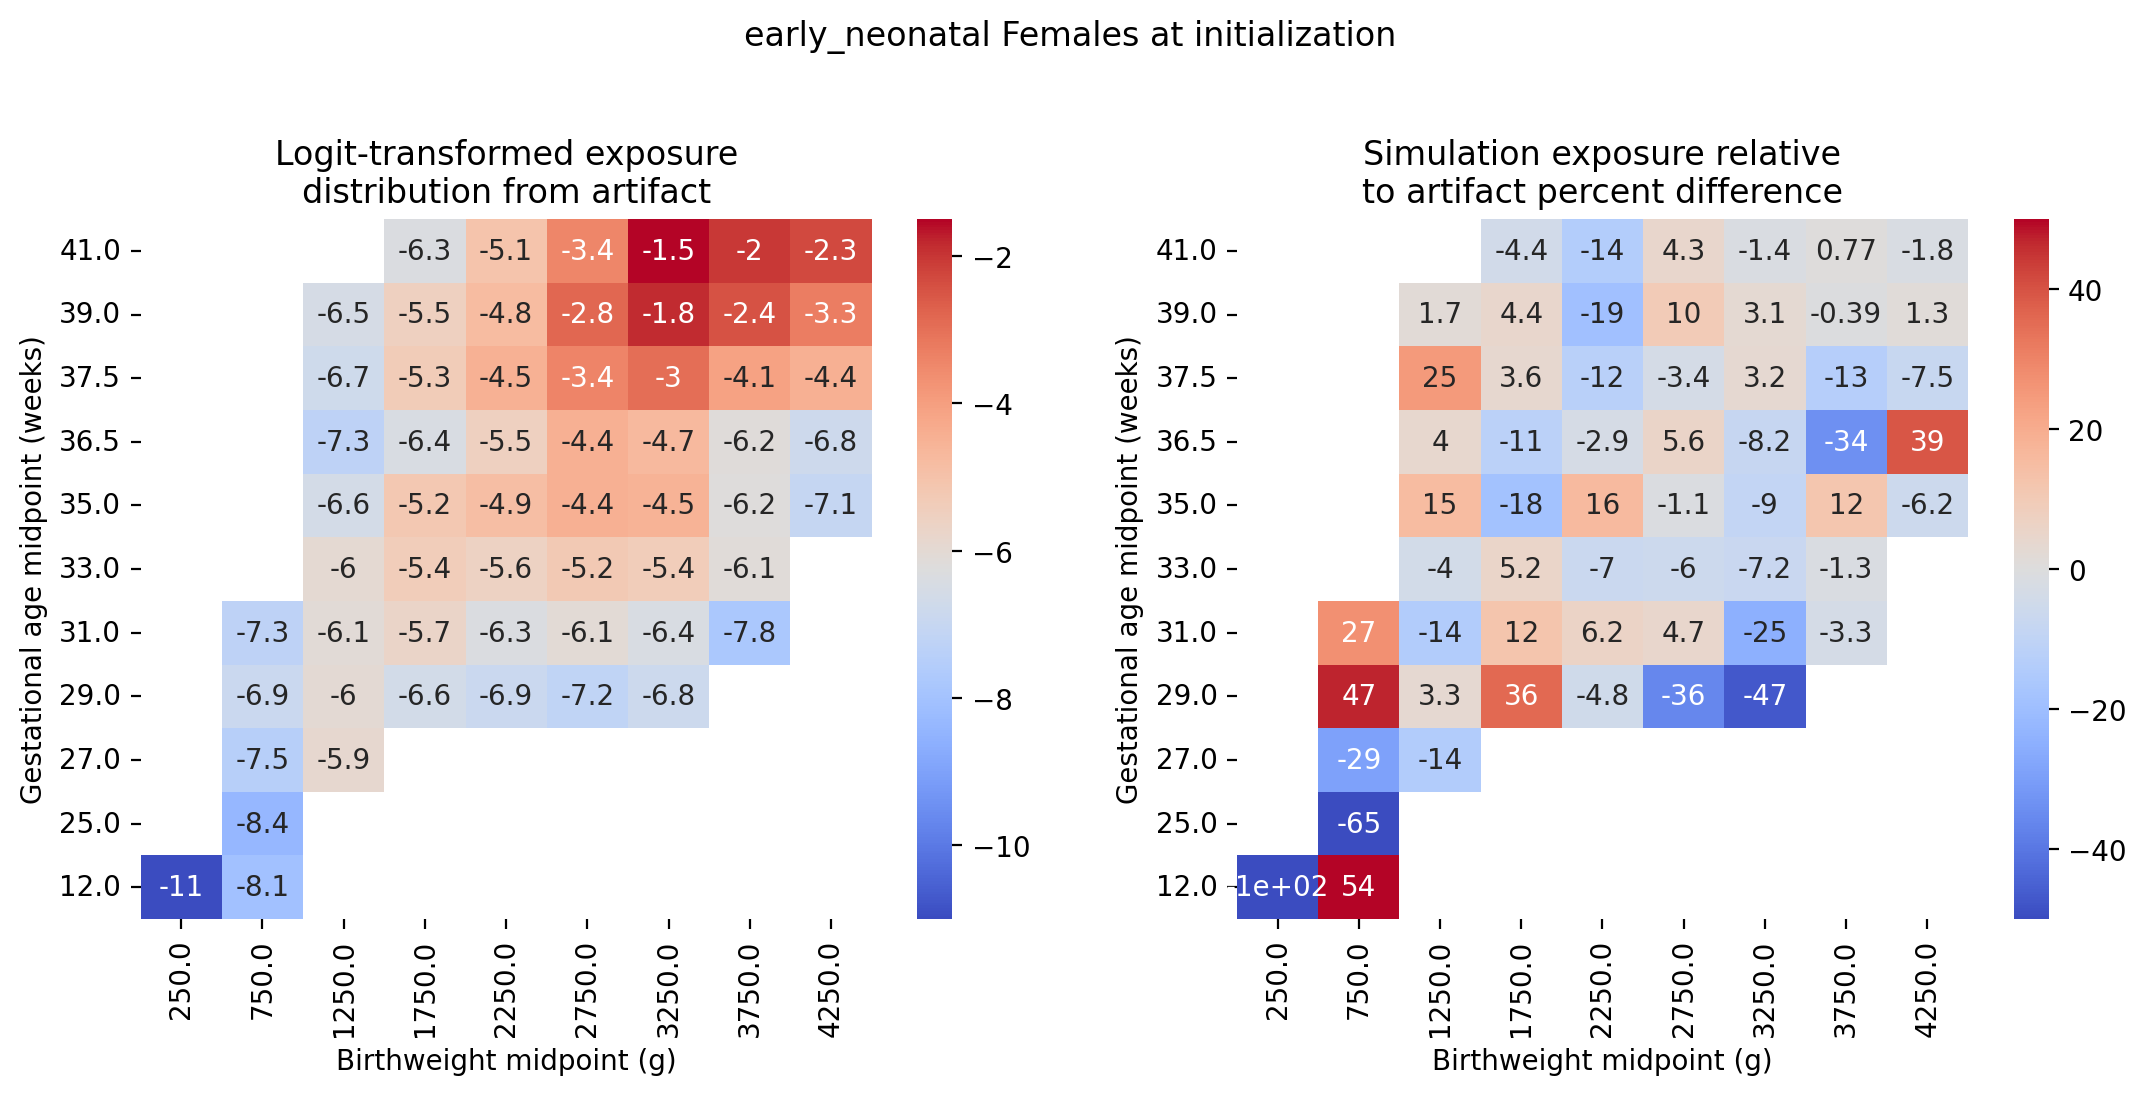

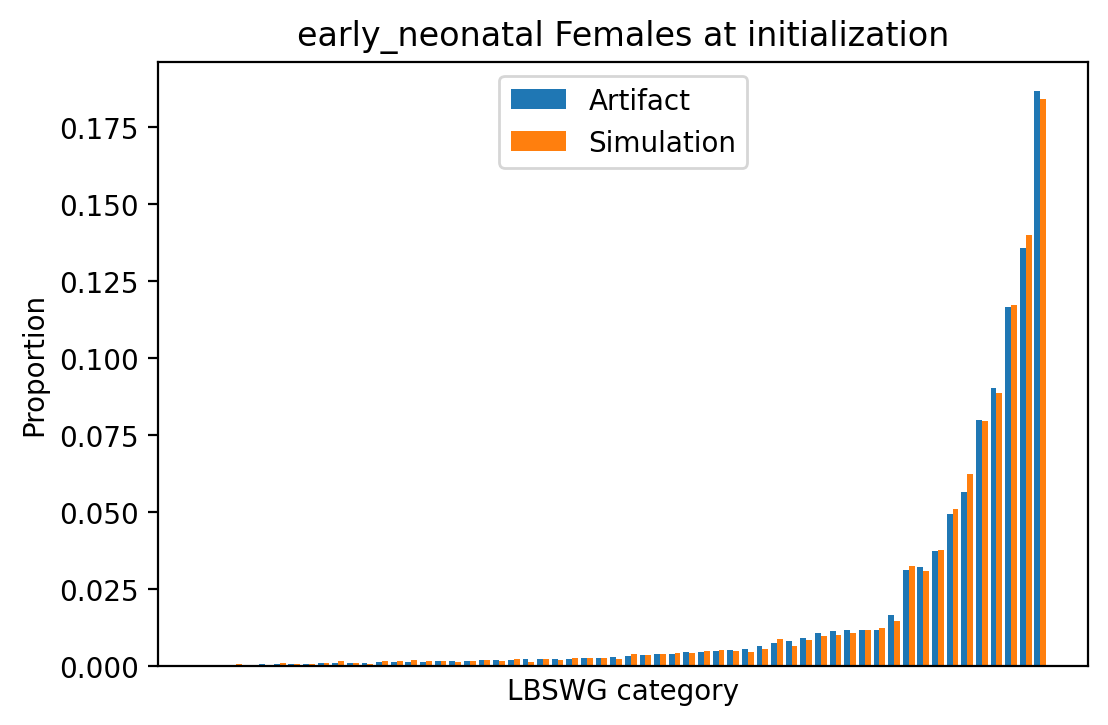

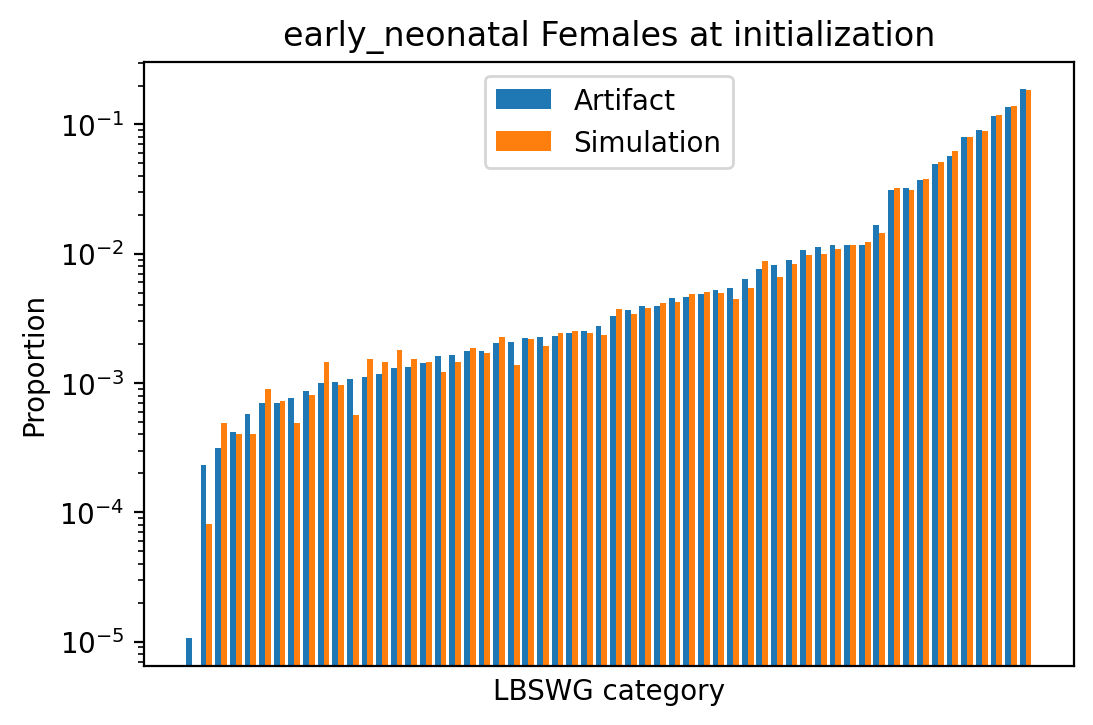

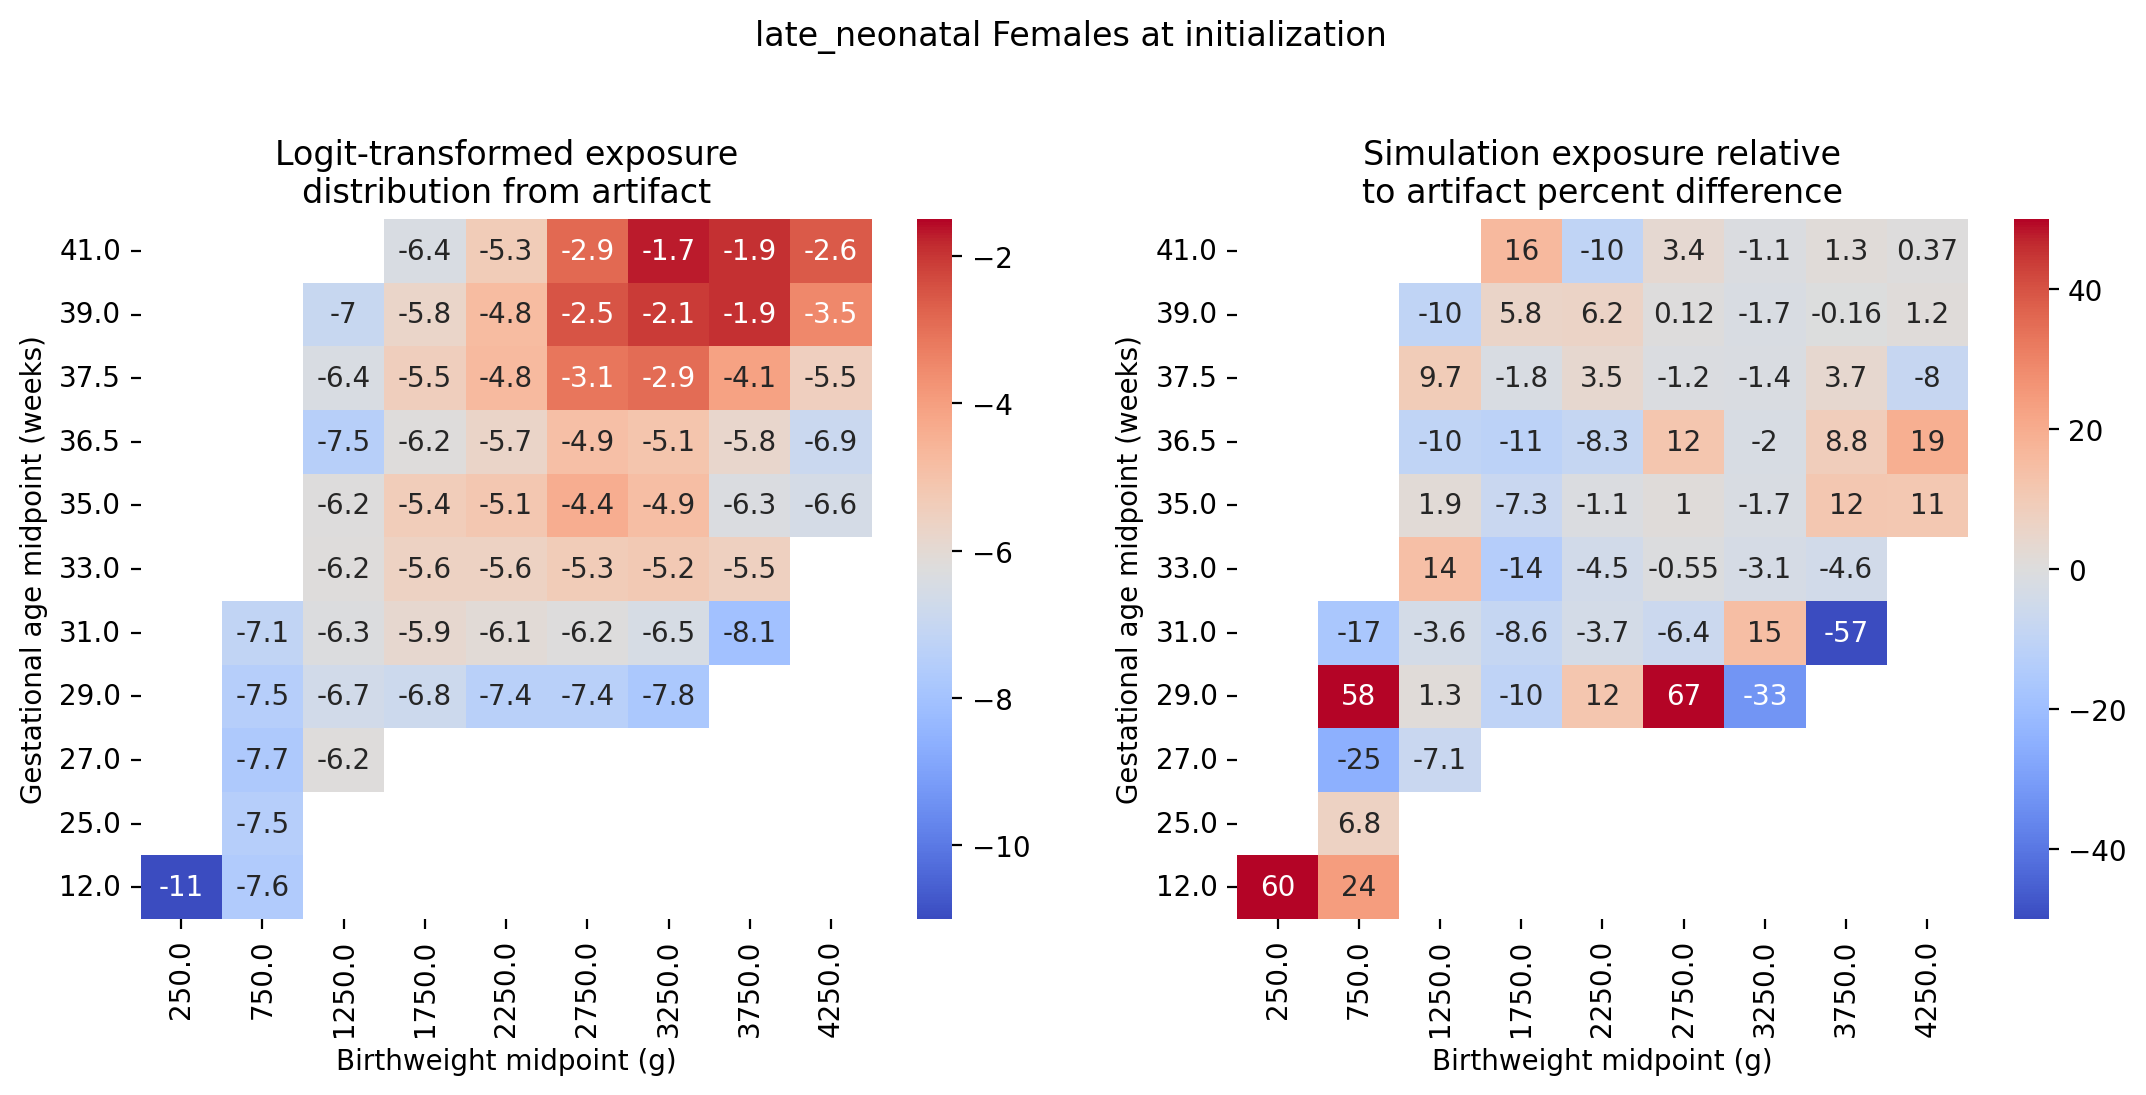

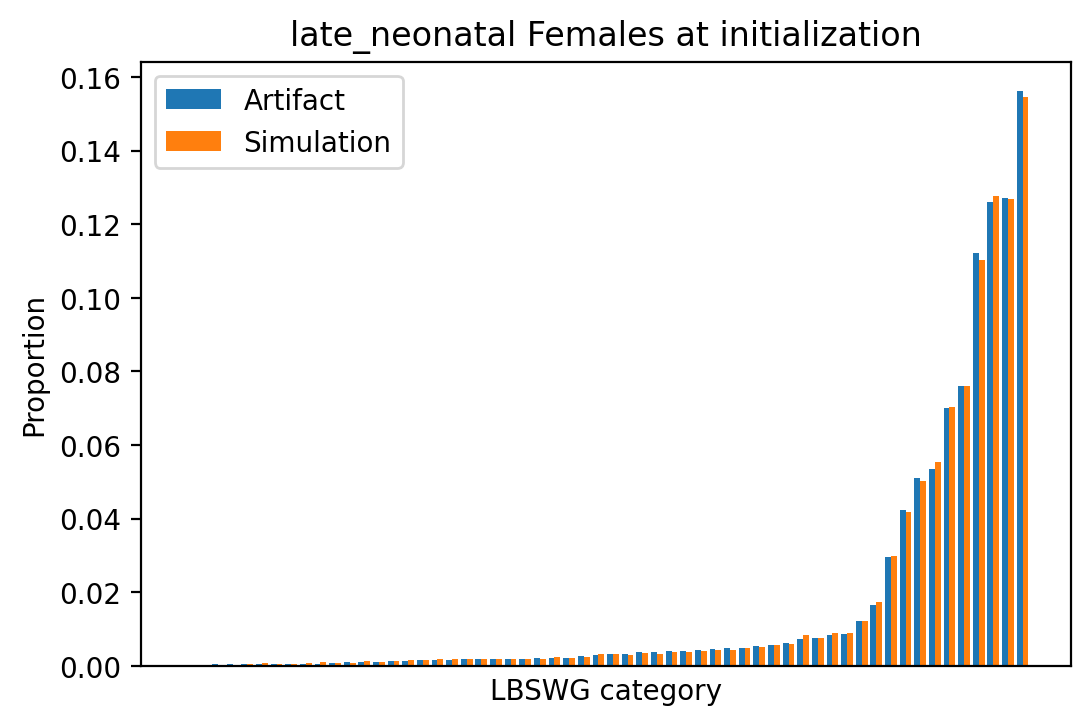

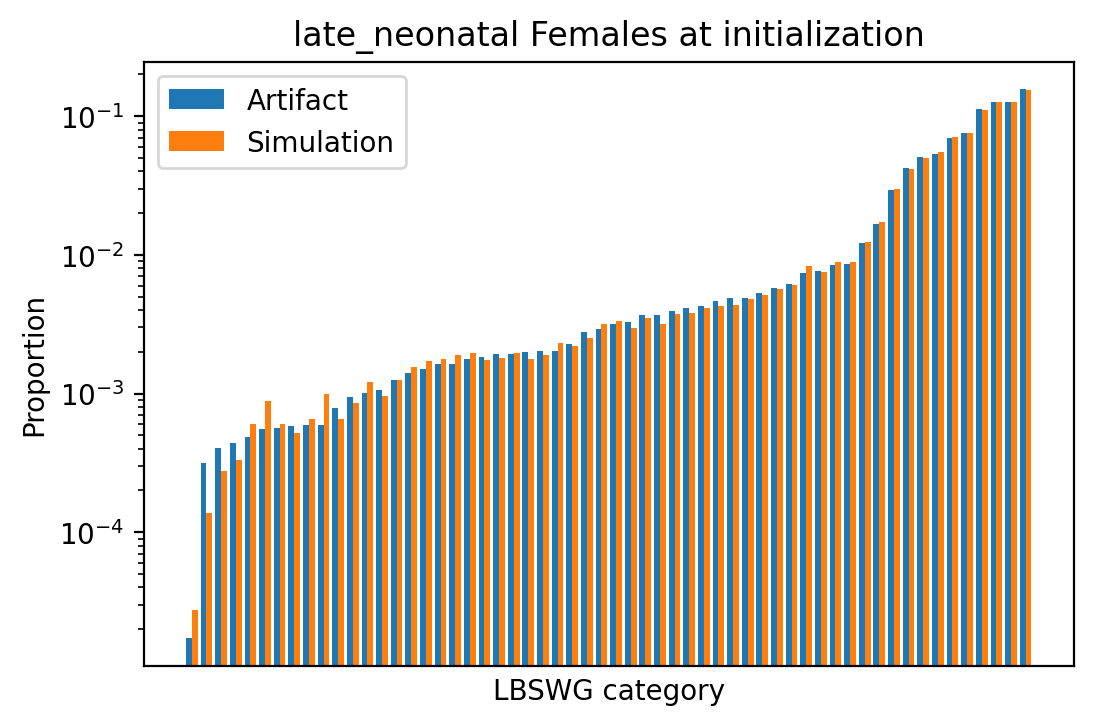

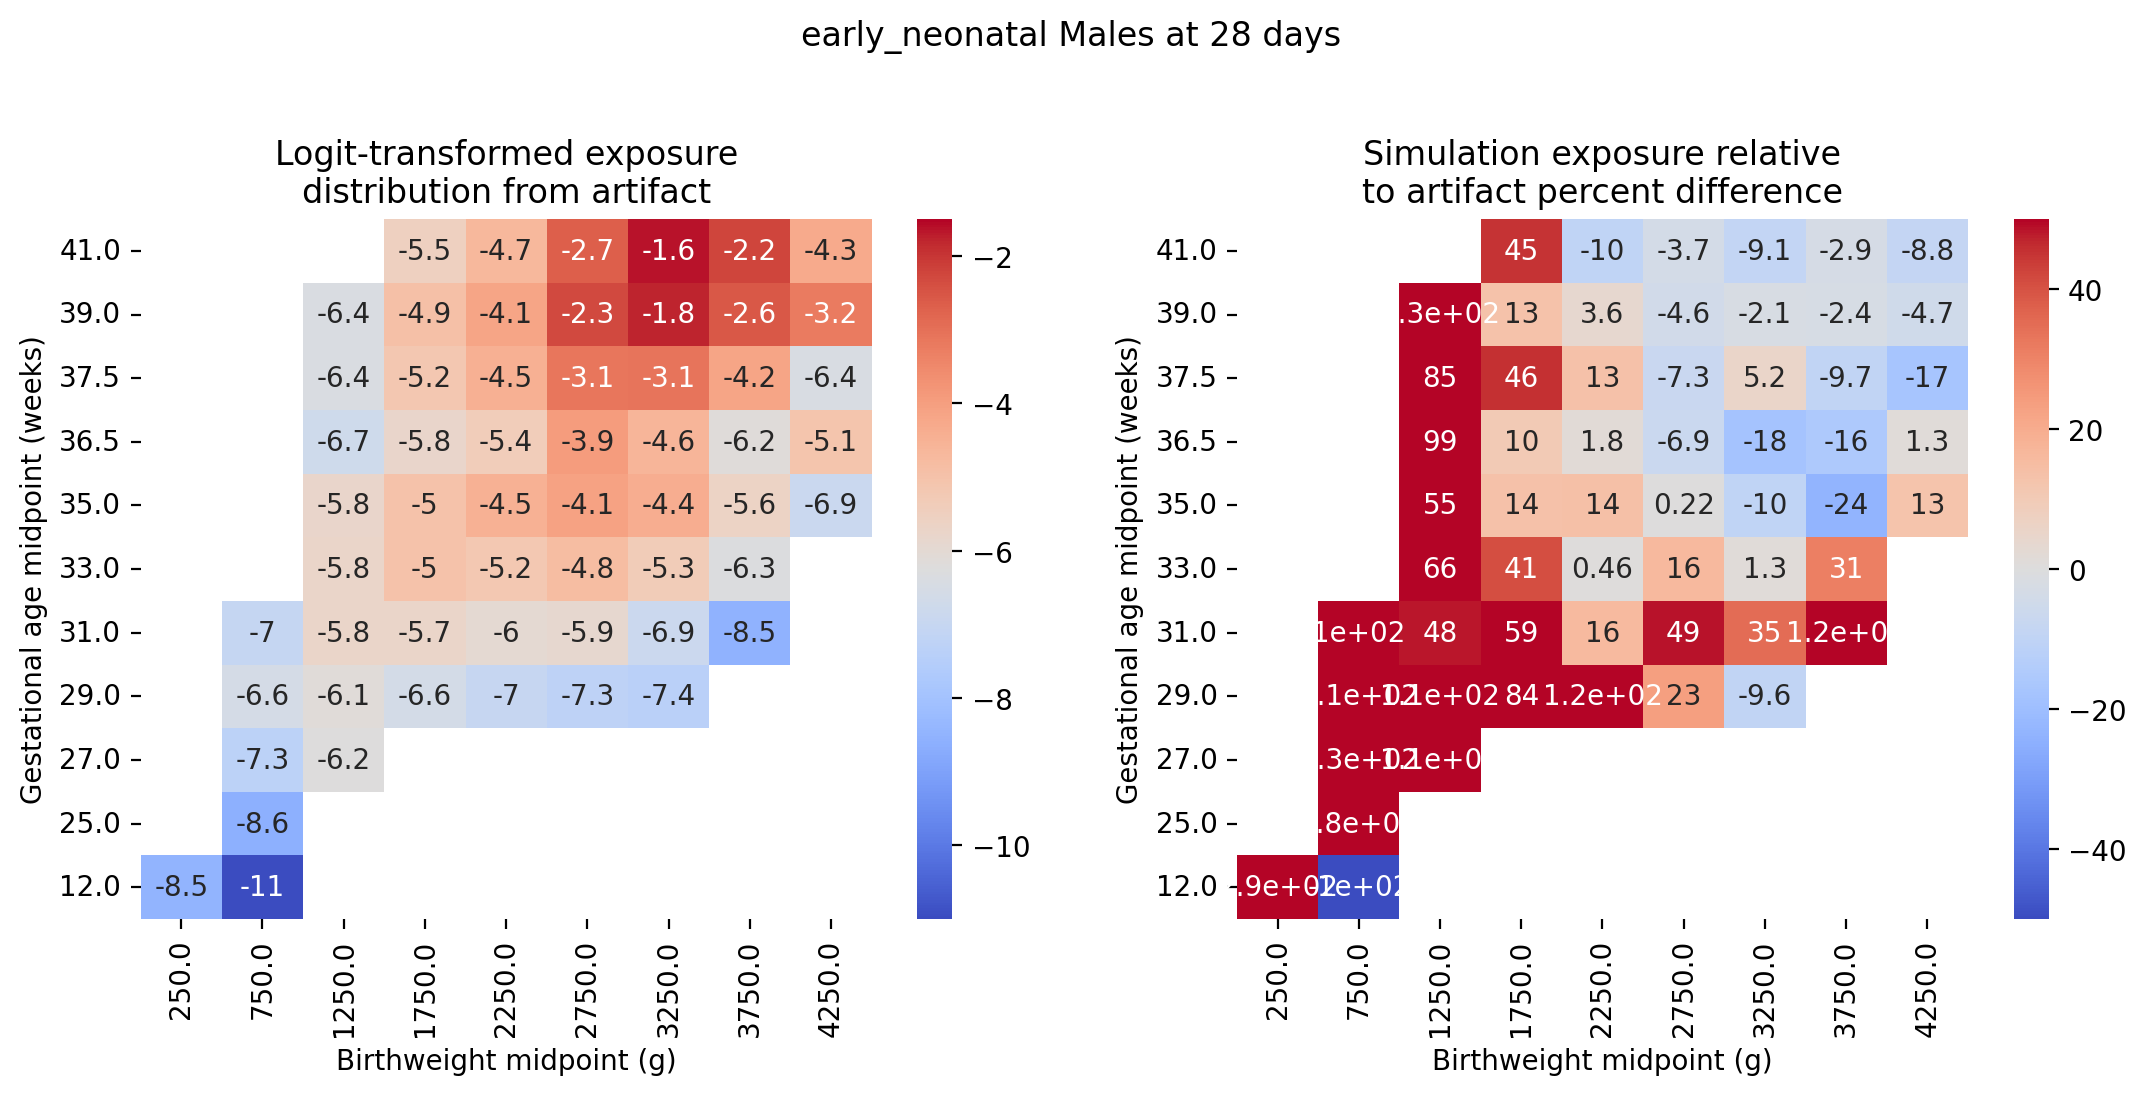

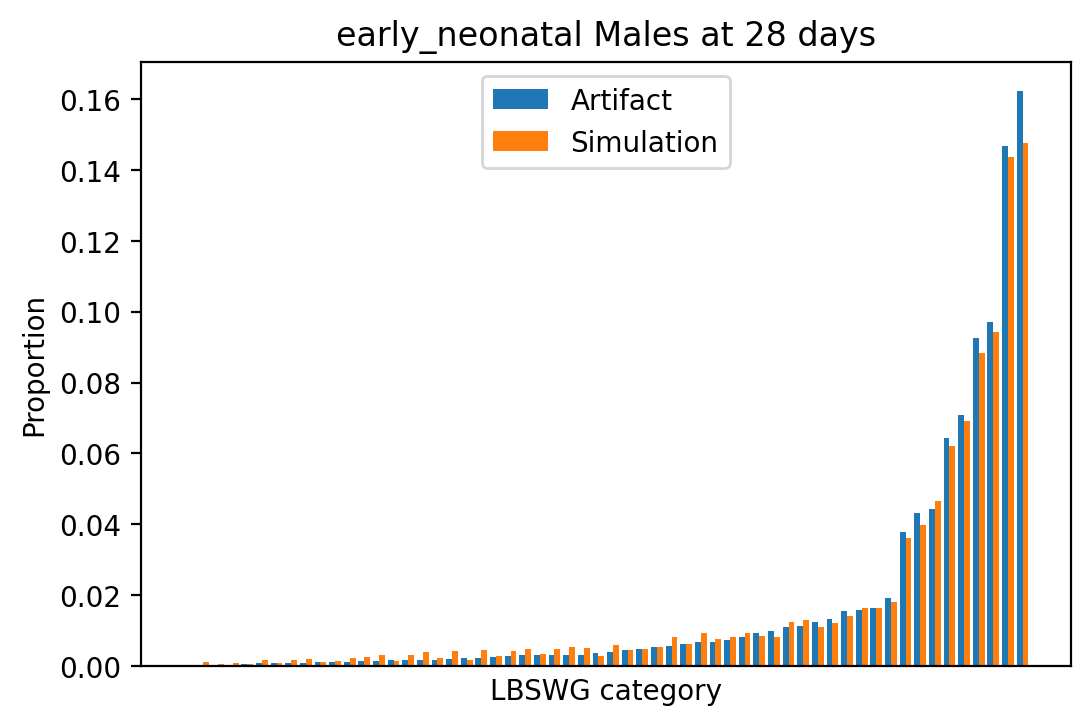

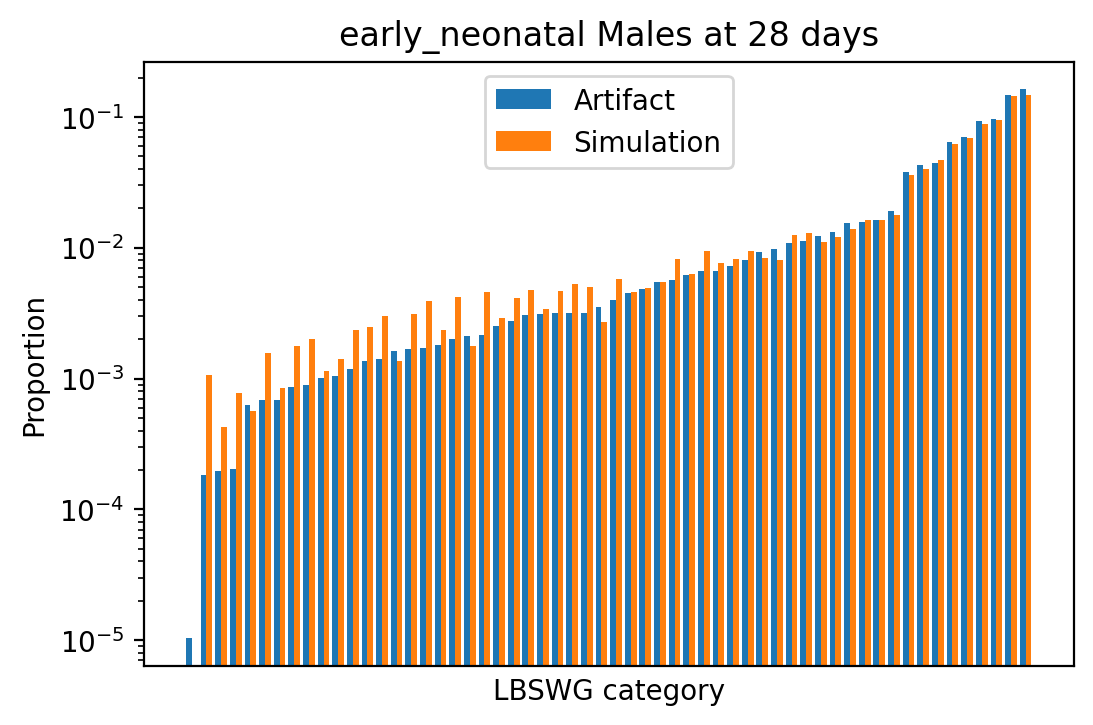

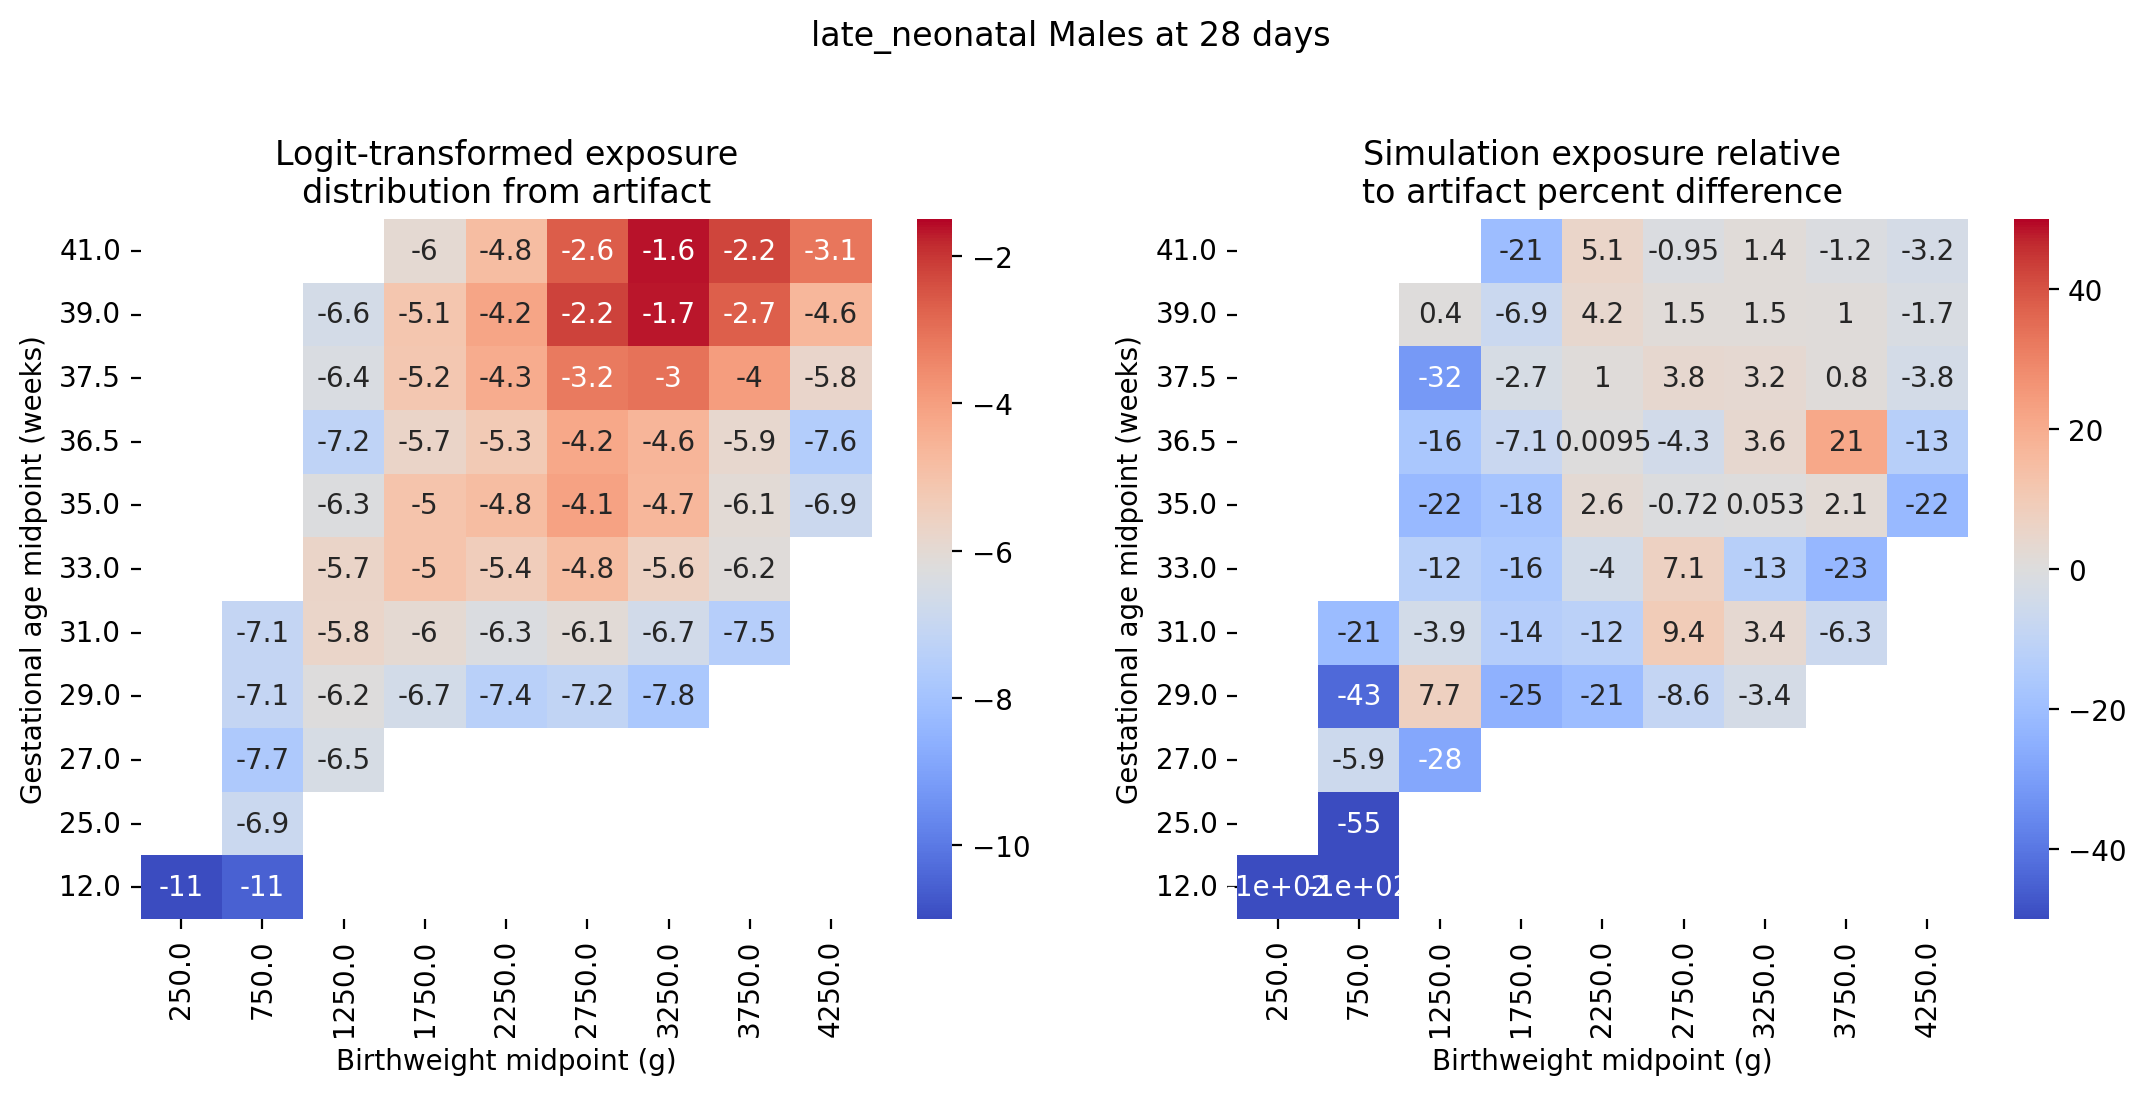

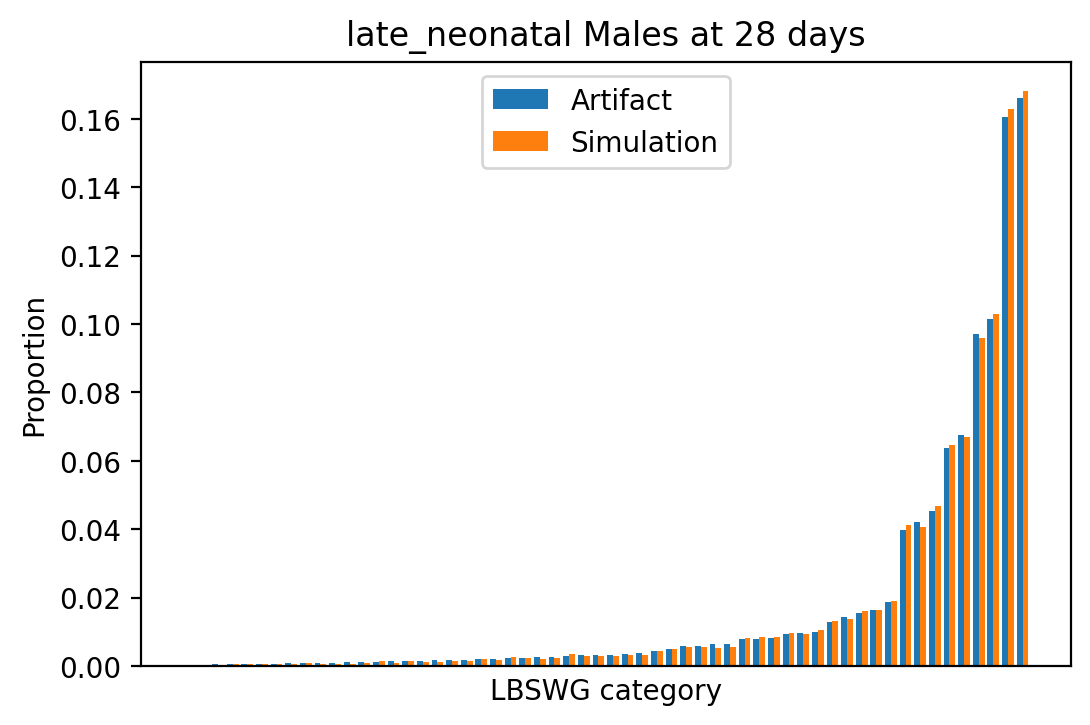

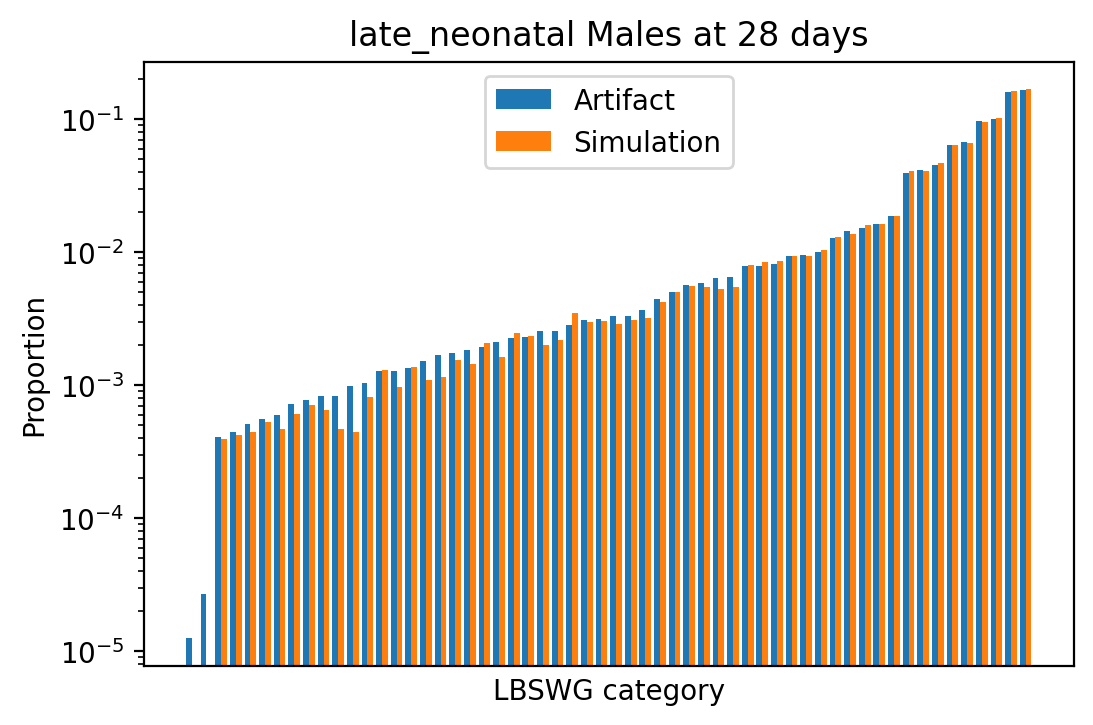

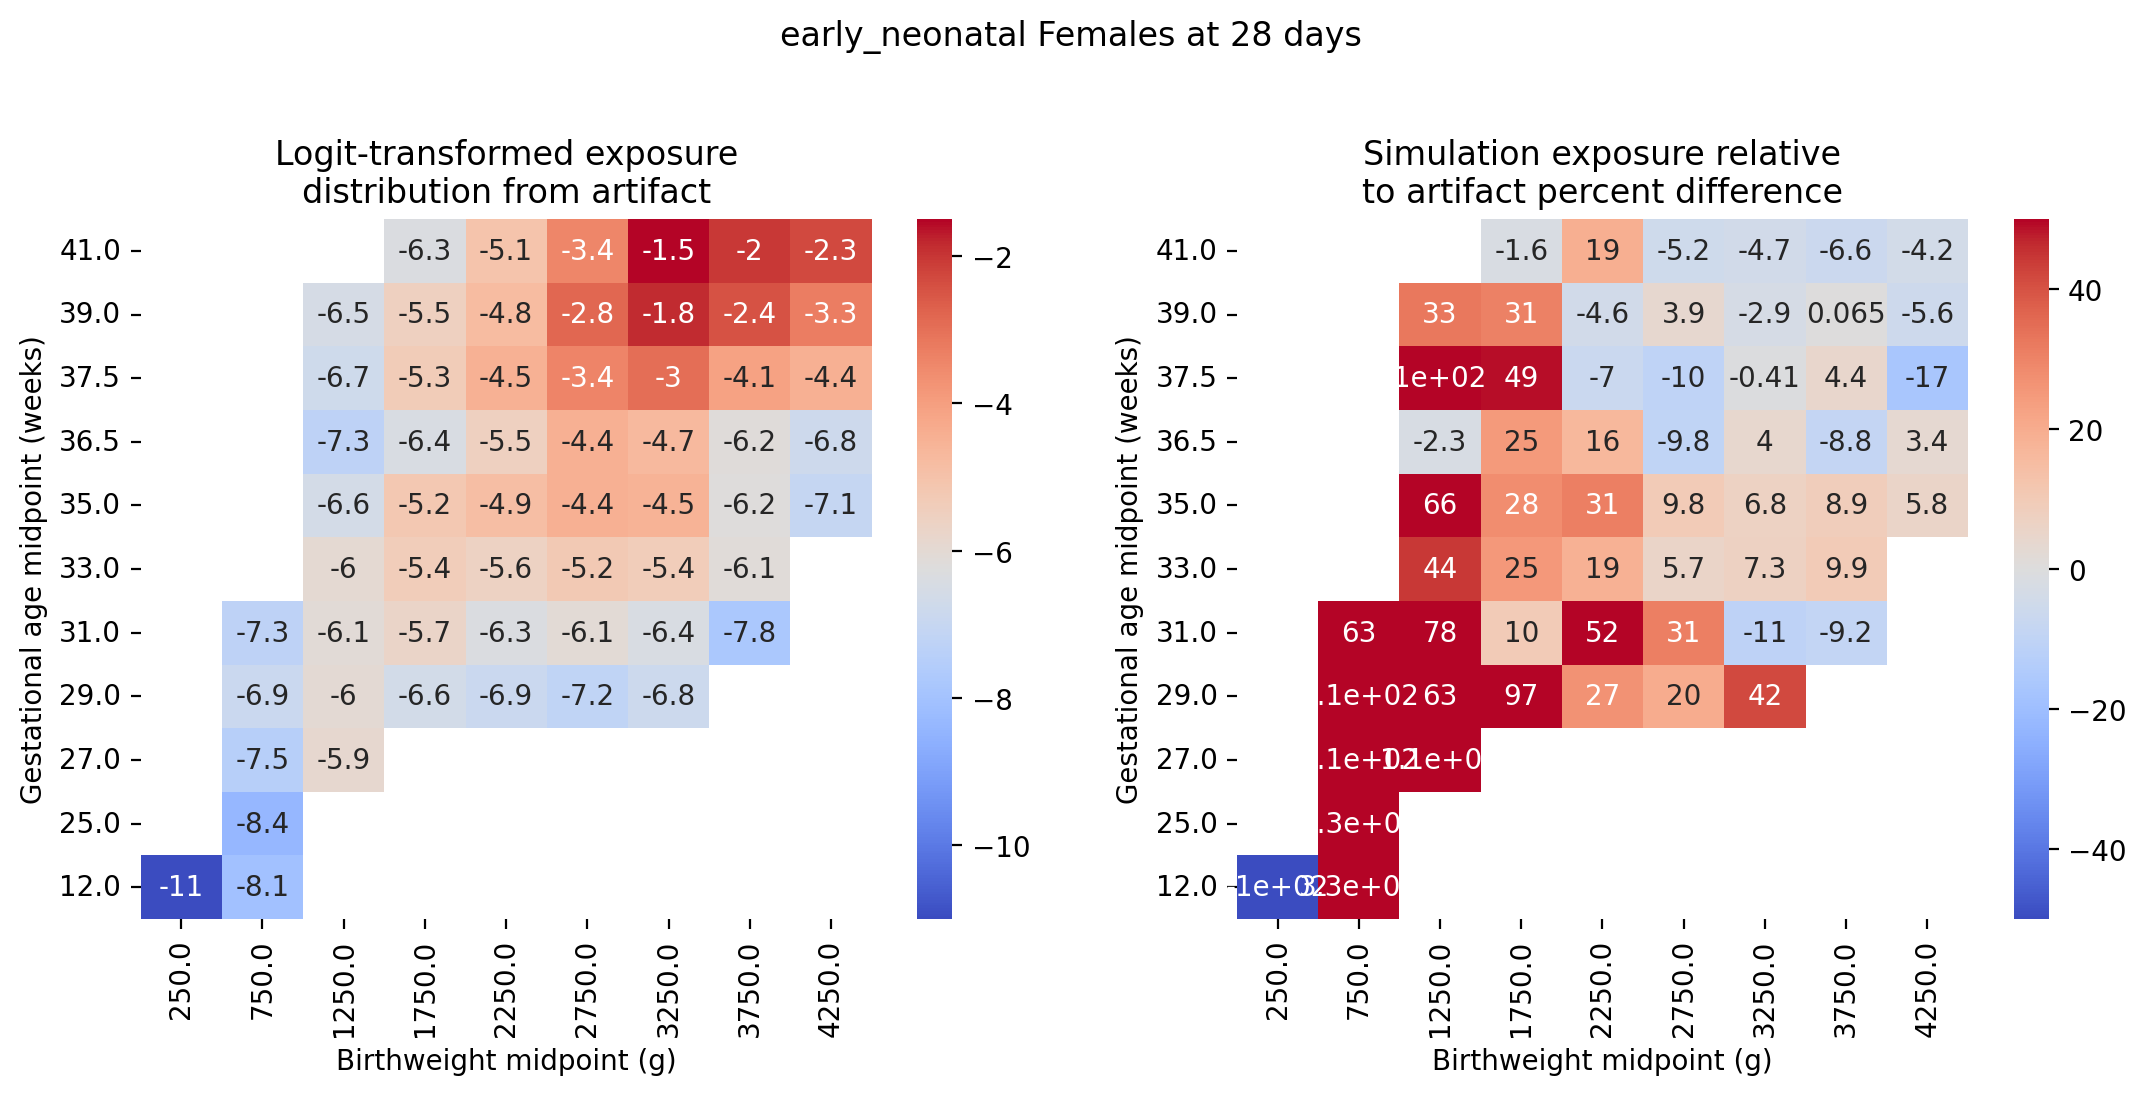

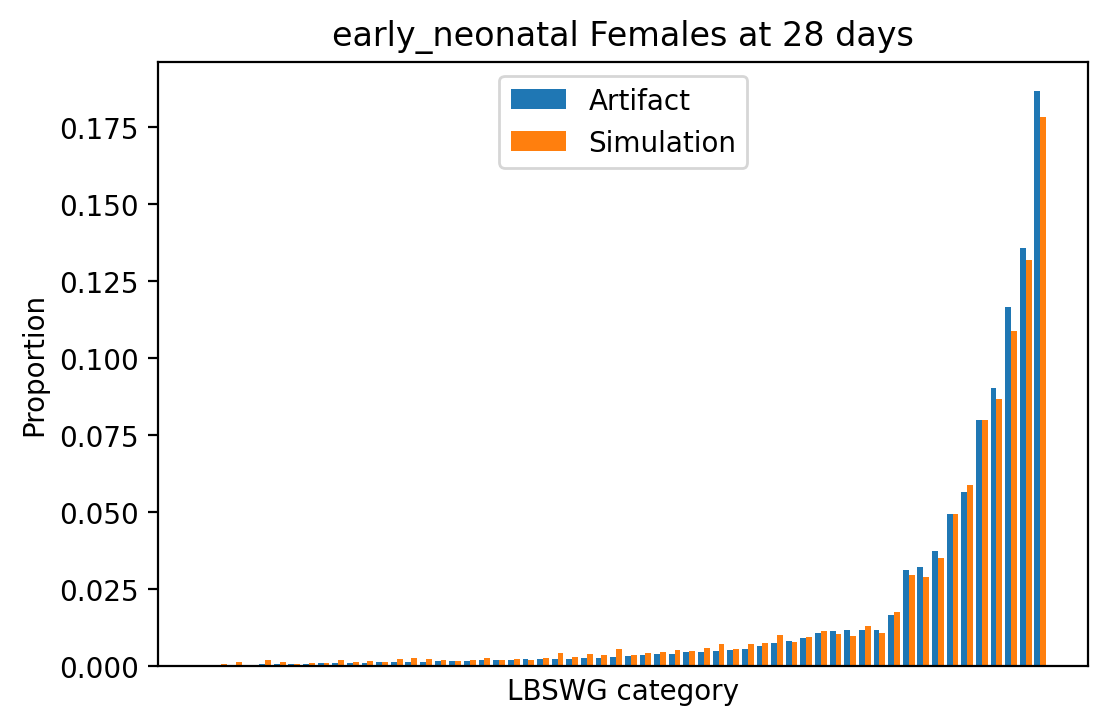

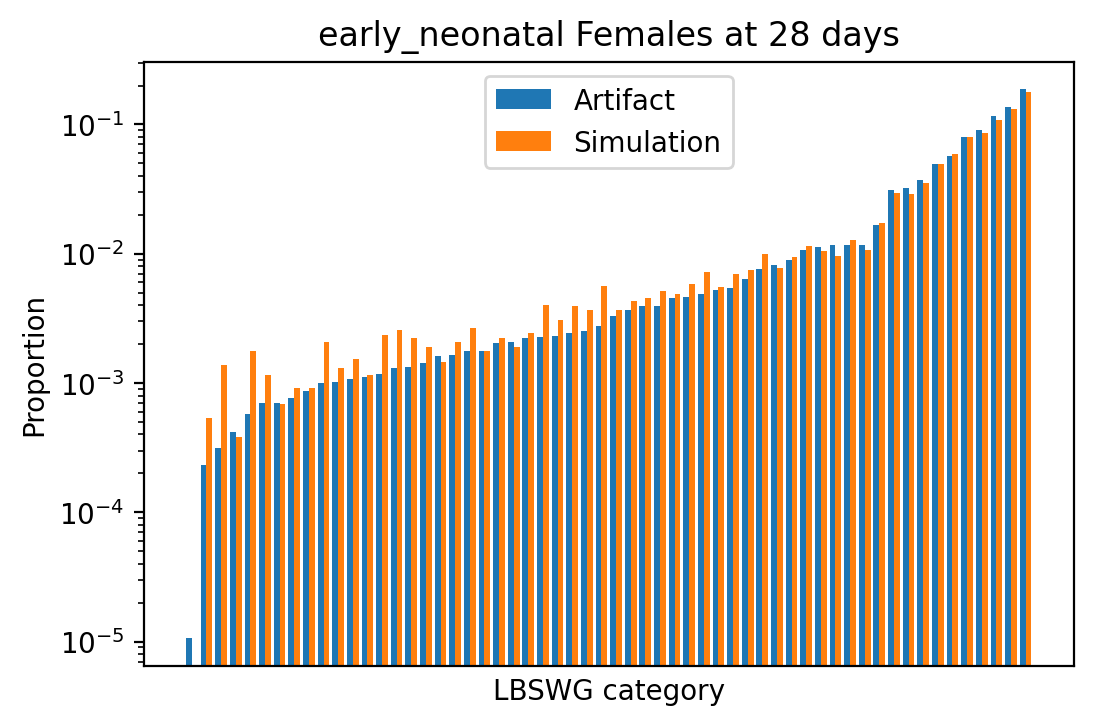

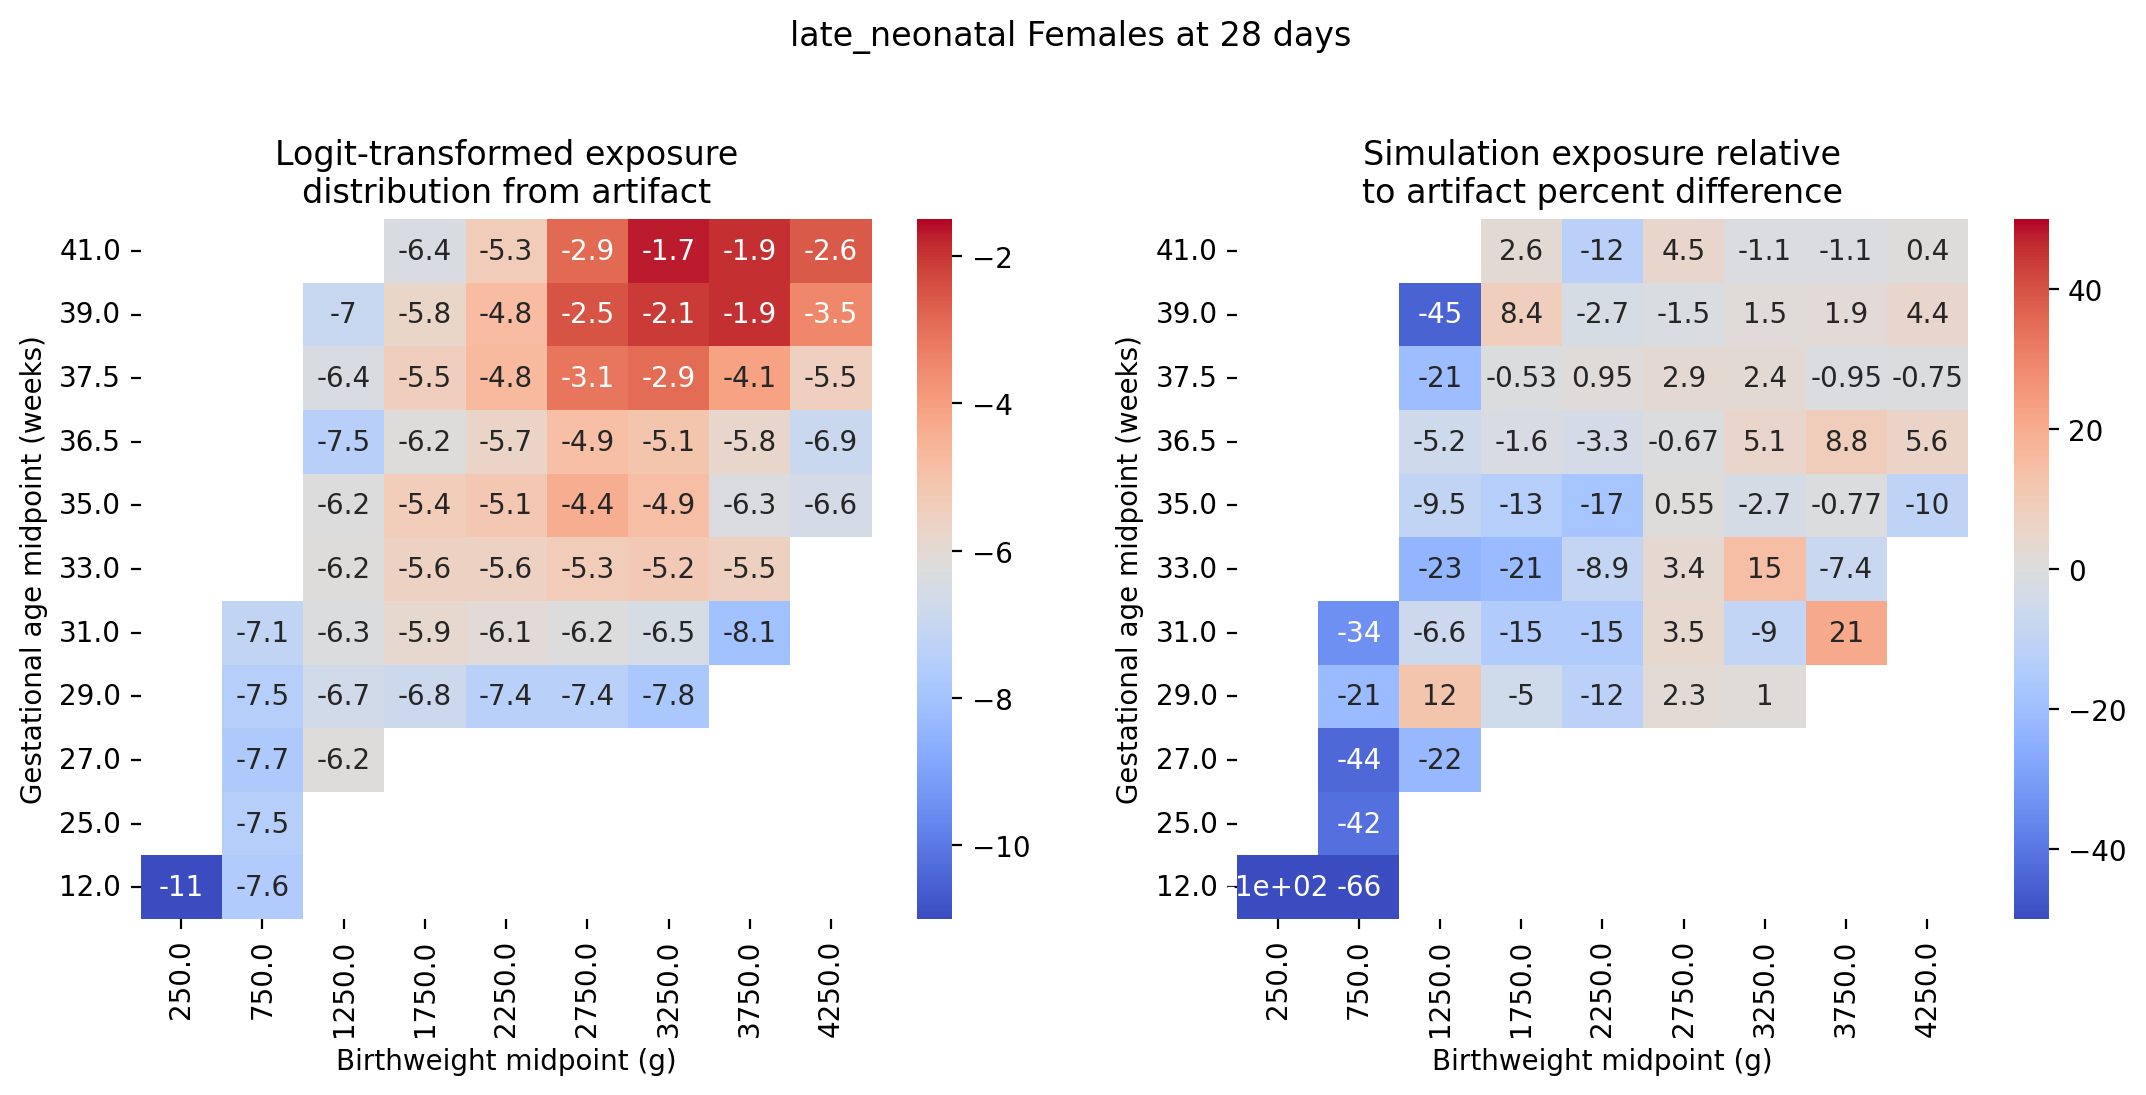

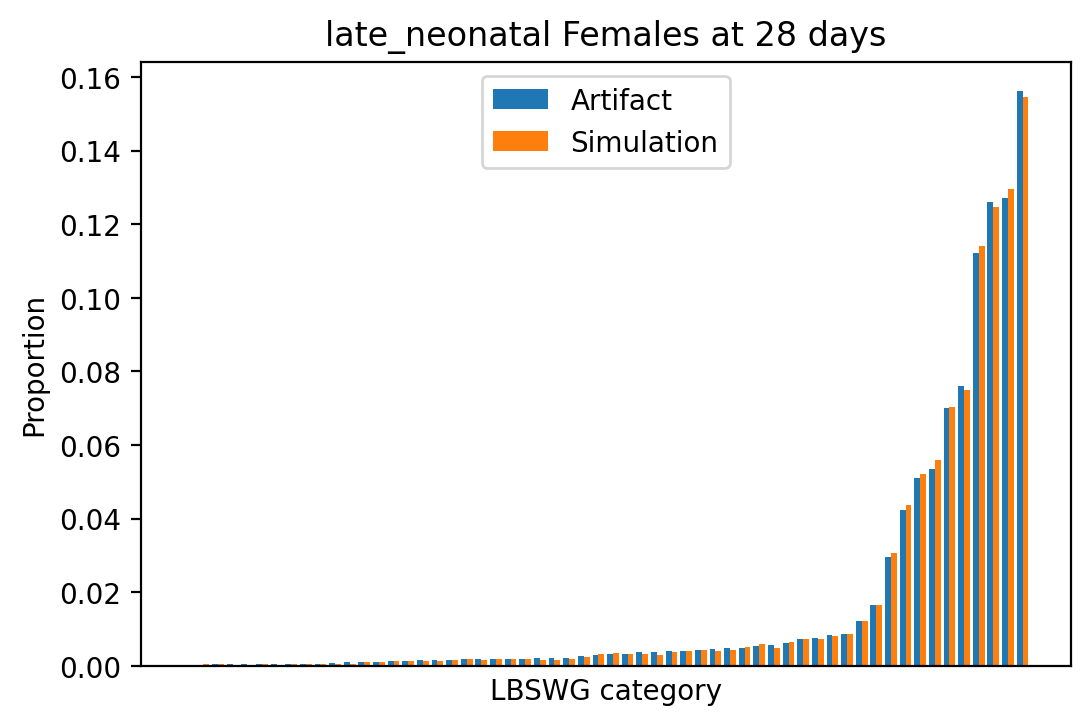

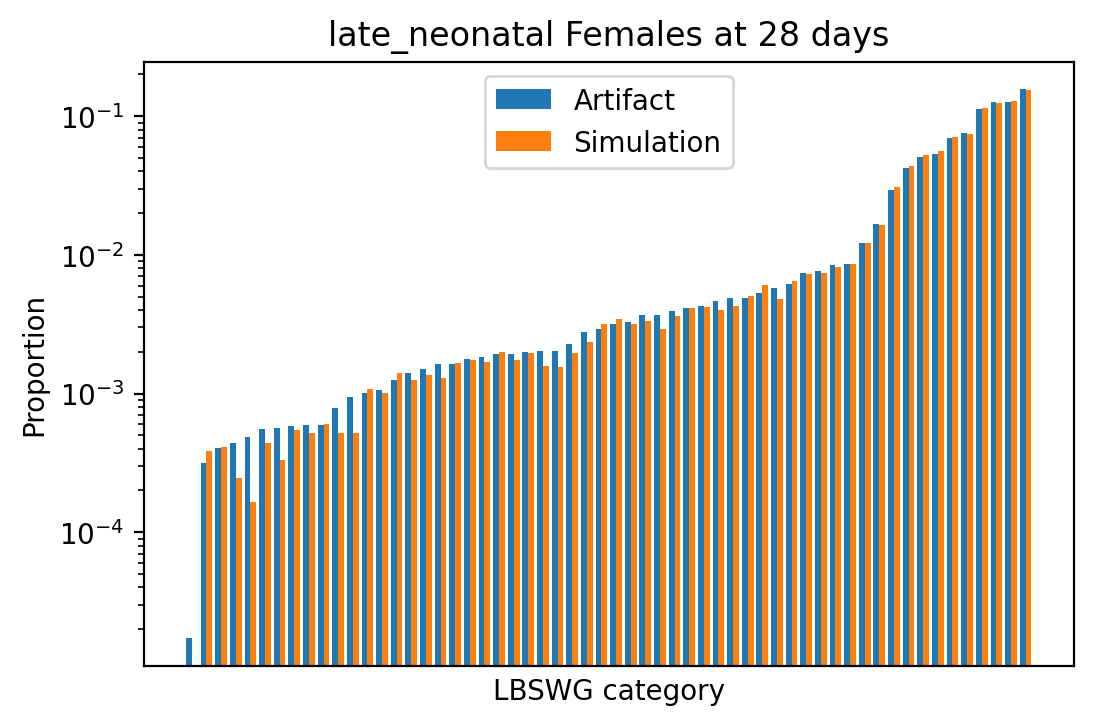

In [21]:
with PdfPages('model_5.2.0_lbwsg_exposure_updated.pdf') as pdf:

    for sex in ['Male','Female']:
        for age_group in ['early_neonatal','late_neonatal']:
            plot_exposure_heat_map(sex, age_group, prev, 'at initialization')
            pdf.savefig(bbox_inches='tight')
            bar_chart(sex, age_group, prev, 'at initialization', log=False)
            pdf.savefig(bbox_inches='tight')
            bar_chart(sex, age_group, prev, 'at initialization', log=True)
            pdf.savefig(bbox_inches='tight')

    #for sex in ['Male','Female']:
    #    for age_group in ['birth']:
    #        plot_exposure_heat_map(sex, age_group, births, 'at birth')
    #        pdf.savefig(bbox_inches='tight')
    #        bar_chart(sex, age_group, births, 'at birth', log=False)
    #        pdf.savefig(bbox_inches='tight')
    #        bar_chart(sex, age_group, births, 'at birth', log=True)
    #        pdf.savefig(bbox_inches='tight')
            
    for sex in ['Male','Female']:
        for age_group in ['early_neonatal','late_neonatal']:
            plot_exposure_heat_map(sex, age_group, prev1, 'at 28 days')
            pdf.savefig(bbox_inches='tight')
            bar_chart(sex, age_group, prev1, 'at 28 days', log=False)
            pdf.savefig(bbox_inches='tight')
            bar_chart(sex, age_group, prev1, 'at 28 days', log=True)
            pdf.savefig(bbox_inches='tight')
